# 2.0 Data Understanding

### 2.2.1 Load Dataset

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read data into a DataFrame
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


### 2.2.2 Rename data column


In [20]:
#rename Column name
df = df.rename(columns = {'SystolicBP':'Systolic Blood Pressure', 'DiastolicBP':'Diastolic Blood Pressure', 'BS':'Blood Sugar','BodyTemp':'Body Temperature', 'HeartRate':'Heart Rate', 'RiskLevel':'Risk Level'})
df.head(10)

,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Sugar,Body Temperature,Heart Rate,Risk Level
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


In [3]:
print("Number of rows: ", len(df))

Number of rows:  1014


In [4]:
df.dtypes

Age                           int64
Systolic Blood Pressure       int64
Diastolic Blood Pressure      int64
Blood Sugar                 float64
Body Temperature            float64
Heart Rate                    int64
Risk Level                   object
dtype: object

In [5]:
df.describe()

,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Sugar,Body Temperature,Heart Rate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


### 2.2.3 Correlation between each variable

                               Age  Systolic Blood Pressure  \
Age                       1.000000                 0.416045   
Systolic Blood Pressure   0.416045                 1.000000   
Diastolic Blood Pressure  0.398026                 0.787006   
Blood Sugar               0.473284                 0.425172   
Body Temperature         -0.255323                -0.286616   
Heart Rate                0.079798                -0.023108   

                          Diastolic Blood Pressure  Blood Sugar  \
Age                                       0.398026     0.473284   
Systolic Blood Pressure                   0.787006     0.425172   
Diastolic Blood Pressure                  1.000000     0.423824   
Blood Sugar                               0.423824     1.000000   
Body Temperature                         -0.257538    -0.103493   
Heart Rate                               -0.046151     0.142867   

                          Body Temperature  Heart Rate  
Age                            

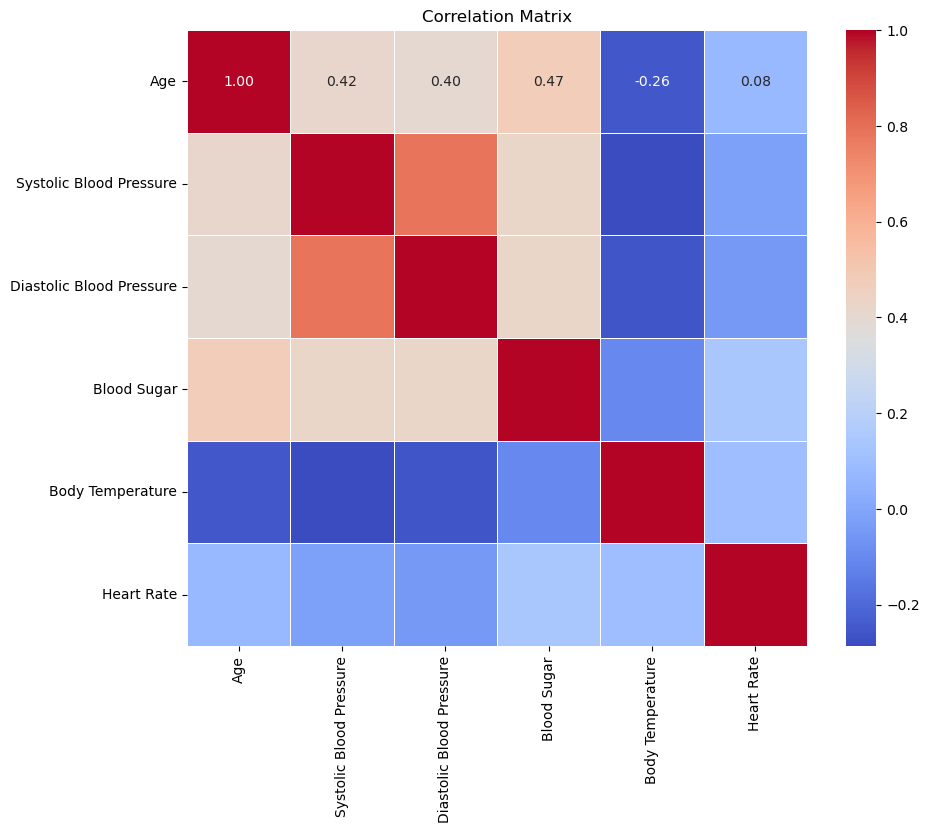

In [6]:
import pandas as pd

corr_matrix = df[['Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Blood Sugar', 'Body Temperature', 'Heart Rate']].corr()

# Print the correlation matrix
print(corr_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## 2.3 Independent Variable

### 2.3.1 Age

In [7]:
Overview_Age = df.Age.describe()

print('Summary of Age :')
print('--------------------')
print(Overview_Age)
print('--------------------')

Summary of Age :
--------------------
count    1014.000000
mean       29.871795
std        13.474386
min        10.000000
25%        19.000000
50%        26.000000
75%        39.000000
max        70.000000
Name: Age, dtype: float64
--------------------


In [8]:
# Grouping data by age and risk level and counting occurrences
age_risklevel_counts = df.groupby(['Age', 'Risk Level']).size().unstack(fill_value=0)

# Loop through each age group
for age_group, row in age_risklevel_counts.iterrows():
    print(f"Age Group: {age_group}")
    print("-----------------------")
    # Print count of each risk level for the current age group
    print(f"high risk: {row['high risk']}")
    print(f"mid risk: {row['mid risk']}")
    print(f"low risk: {row['low risk']}")
    print("\n")

Age Group: 10
-----------------------
high risk: 0
mid risk: 2
low risk: 2


Age Group: 12
-----------------------
high risk: 7
mid risk: 13
low risk: 15


Age Group: 13
-----------------------
high risk: 3
mid risk: 7
low risk: 2


Age Group: 14
-----------------------
high risk: 3
mid risk: 0
low risk: 0


Age Group: 15
-----------------------
high risk: 0
mid risk: 4
low risk: 56


Age Group: 16
-----------------------
high risk: 0
mid risk: 6
low risk: 10


Age Group: 17
-----------------------
high risk: 24
mid risk: 21
low risk: 18


Age Group: 18
-----------------------
high risk: 0
mid risk: 11
low risk: 8


Age Group: 19
-----------------------
high risk: 2
mid risk: 37
low risk: 28


Age Group: 20
-----------------------
high risk: 0
mid risk: 11
low risk: 11


Age Group: 21
-----------------------
high risk: 0
mid risk: 11
low risk: 27


Age Group: 22
-----------------------
high risk: 5
mid risk: 12
low risk: 28


Age Group: 23
-----------------------
high risk: 5
mid risk:

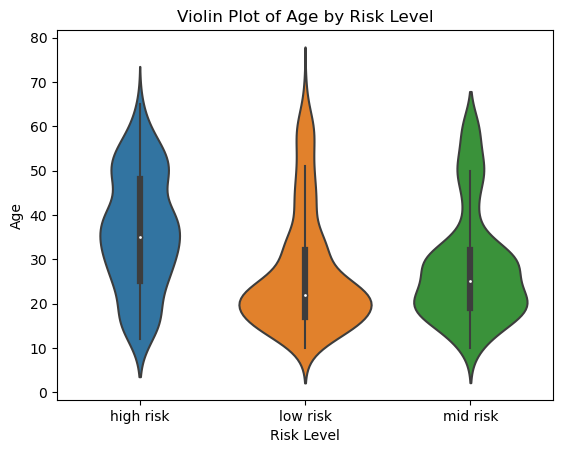

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot
sns.violinplot(x='Risk Level', y='Age', data=df)
plt.xlabel('Risk Level')
plt.ylabel('Age')
plt.title('Violin Plot of Age by Risk Level')
plt.show()

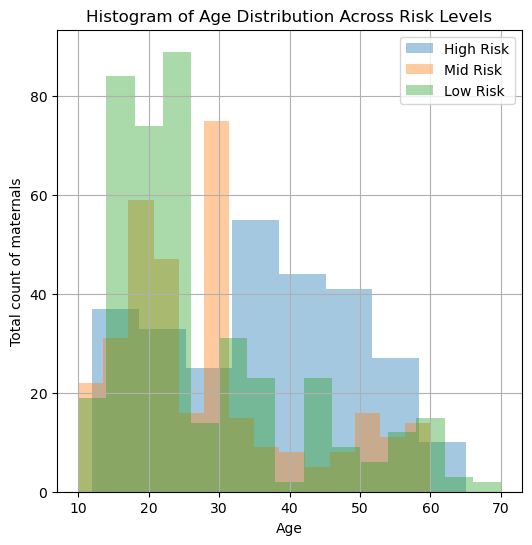

In [10]:
import warnings
warnings.filterwarnings(action='ignore')

# Filtering DataFrame to separate cases with and without heart disease based on the 'RiskLevel' column
age_high_risk = df.loc[df["Risk Level"] == 'high risk']
age_mid_risk = df.loc[df["Risk Level"] == 'mid risk']
age_low_risk = df.loc[df["Risk Level"] == 'low risk']

# Plotting the distribution of age for different risk levels
plt.figure(figsize=(6,6))
sns.distplot(age_high_risk["Age"], kde=False)
sns.distplot(age_mid_risk["Age"], kde=False)
sns.distplot(age_low_risk["Age"], kde=False)

# Adding legend and labels
plt.legend(["High Risk", "Mid Risk", "Low Risk"])
plt.title('Histogram of Age Distribution Across Risk Levels')
plt.ylabel('Total count of maternals')
plt.xlabel('Age')
plt.grid()

# Displaying the plot
plt.show()

<Figure size 2000x2000 with 0 Axes>

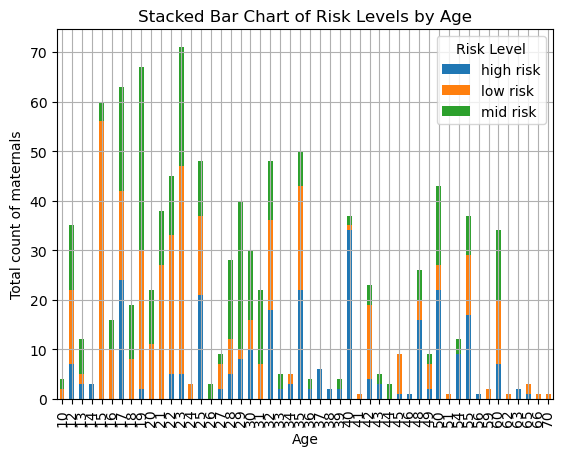

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by age and RiskLevel, and counting occurrences
grouped_data = df.groupby(['Age', 'Risk Level']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(20, 20))
grouped_data.plot(kind='bar', stacked=True)

# Adding legend and labels
plt.title('Stacked Bar Chart of Risk Levels by Age')
plt.ylabel('Total count of maternals')
plt.xlabel('Age')
plt.legend(title='Risk Level')
plt.grid(True)  # Adding grid lines

# Displaying the plot
plt.show()

### 2.3.2 Systolic Blood Pressure

In [12]:
Overview_SystolicBP= df['Systolic Blood Pressure'].describe()

print('Overview of Systolic blood pressure')
print('--------------------')
print(Overview_SystolicBP)
print('--------------------')

Overview of Systolic blood pressure
--------------------
count    1014.000000
mean      113.198225
std        18.403913
min        70.000000
25%       100.000000
50%       120.000000
75%       120.000000
max       160.000000
Name: Systolic Blood Pressure, dtype: float64
--------------------


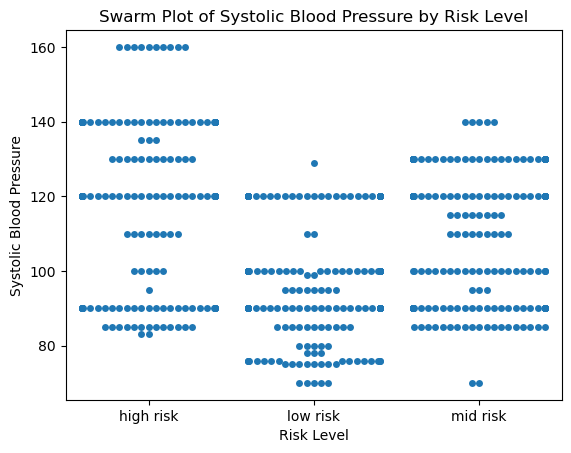

In [13]:
# Swarm plot
sns.swarmplot(x='Risk Level', y='Systolic Blood Pressure', data=df)
plt.xlabel('Risk Level')
plt.ylabel('Systolic Blood Pressure')
plt.title('Swarm Plot of Systolic Blood Pressure by Risk Level')
plt.show()

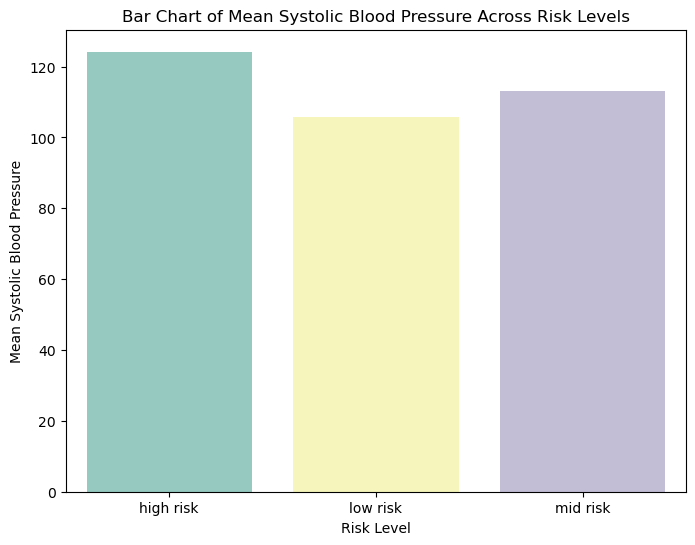

In [14]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings(action='ignore')

# Grouping the data by 'Risk Level' and calculating the mean systolic blood pressure for each group
mean_systolic_bp = df.groupby("Risk Level")["Systolic Blood Pressure"].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=mean_systolic_bp, x="Risk Level", y="Systolic Blood Pressure", palette="Set3")

# Adding labels and title
plt.title('Bar Chart of Mean Systolic Blood Pressure Across Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Mean Systolic Blood Pressure')

# Displaying the plot
plt.show()

In [15]:
# Grouping data by systolic blood pressure (SystolicBP) and risk level and counting occurrences
sys_bp_risklevel_counts = df.groupby(['Systolic Blood Pressure', 'Risk Level']).size().unstack(fill_value=0)

# Loop through each systolic blood pressure group
for sys_bp_group, row in sys_bp_risklevel_counts.iterrows():
    print(f"Systolic Blood Pressure Group: {sys_bp_group}")
    print("-----------------------")
    # Print count of each risk level for the current systolic blood pressure group
    print(f"high risk: {row['high risk']}")
    print(f"mid risk: {row['mid risk']}")
    print(f"low risk: {row['low risk']}")
    print("\n")

Systolic Blood Pressure Group: 70
-----------------------
high risk: 0
mid risk: 2
low risk: 5


Systolic Blood Pressure Group: 75
-----------------------
high risk: 0
mid risk: 0
low risk: 8


Systolic Blood Pressure Group: 76
-----------------------
high risk: 0
mid risk: 0
low risk: 16


Systolic Blood Pressure Group: 78
-----------------------
high risk: 0
mid risk: 0
low risk: 3


Systolic Blood Pressure Group: 80
-----------------------
high risk: 0
mid risk: 0
low risk: 5


Systolic Blood Pressure Group: 83
-----------------------
high risk: 2
mid risk: 0
low risk: 0


Systolic Blood Pressure Group: 85
-----------------------
high risk: 13
mid risk: 19
low risk: 11


Systolic Blood Pressure Group: 90
-----------------------
high risk: 33
mid risk: 49
low risk: 72


Systolic Blood Pressure Group: 95
-----------------------
high risk: 1
mid risk: 3
low risk: 8


Systolic Blood Pressure Group: 99
-----------------------
high risk: 0
mid risk: 0
low risk: 2


Systolic Blood Pressure

Actual amount of pateints(by percentage) in each group:

In [16]:
# Grouping data by systolic blood pressure (SystolicBP) and risk level and counting occurrences
bp_risklevel_counts = df.groupby(['Systolic Blood Pressure', 'Risk Level']).size().unstack(fill_value=0)

# Loop through each systolic blood pressure group
for bp_group, row in bp_risklevel_counts.iterrows():
    total_count = row.sum()  # Total count for the current systolic blood pressure group
    print(f"Systolic Blood Pressure Group: {bp_group}")
    print("-----------------------")
    # Print percentage of each risk level for the current systolic blood pressure group
    print(f"high risk: {row['high risk'] / total_count * 100:.2f}%")
    print(f"mid risk: {row['mid risk'] / total_count * 100:.2f}%")
    print(f"low risk: {row['low risk'] / total_count * 100:.2f}%")
    print("\n")

Systolic Blood Pressure Group: 70
-----------------------
high risk: 0.00%
mid risk: 28.57%
low risk: 71.43%


Systolic Blood Pressure Group: 75
-----------------------
high risk: 0.00%
mid risk: 0.00%
low risk: 100.00%


Systolic Blood Pressure Group: 76
-----------------------
high risk: 0.00%
mid risk: 0.00%
low risk: 100.00%


Systolic Blood Pressure Group: 78
-----------------------
high risk: 0.00%
mid risk: 0.00%
low risk: 100.00%


Systolic Blood Pressure Group: 80
-----------------------
high risk: 0.00%
mid risk: 0.00%
low risk: 100.00%


Systolic Blood Pressure Group: 83
-----------------------
high risk: 100.00%
mid risk: 0.00%
low risk: 0.00%


Systolic Blood Pressure Group: 85
-----------------------
high risk: 30.23%
mid risk: 44.19%
low risk: 25.58%


Systolic Blood Pressure Group: 90
-----------------------
high risk: 21.43%
mid risk: 31.82%
low risk: 46.75%


Systolic Blood Pressure Group: 95
-----------------------
high risk: 8.33%
mid risk: 25.00%
low risk: 66.67%



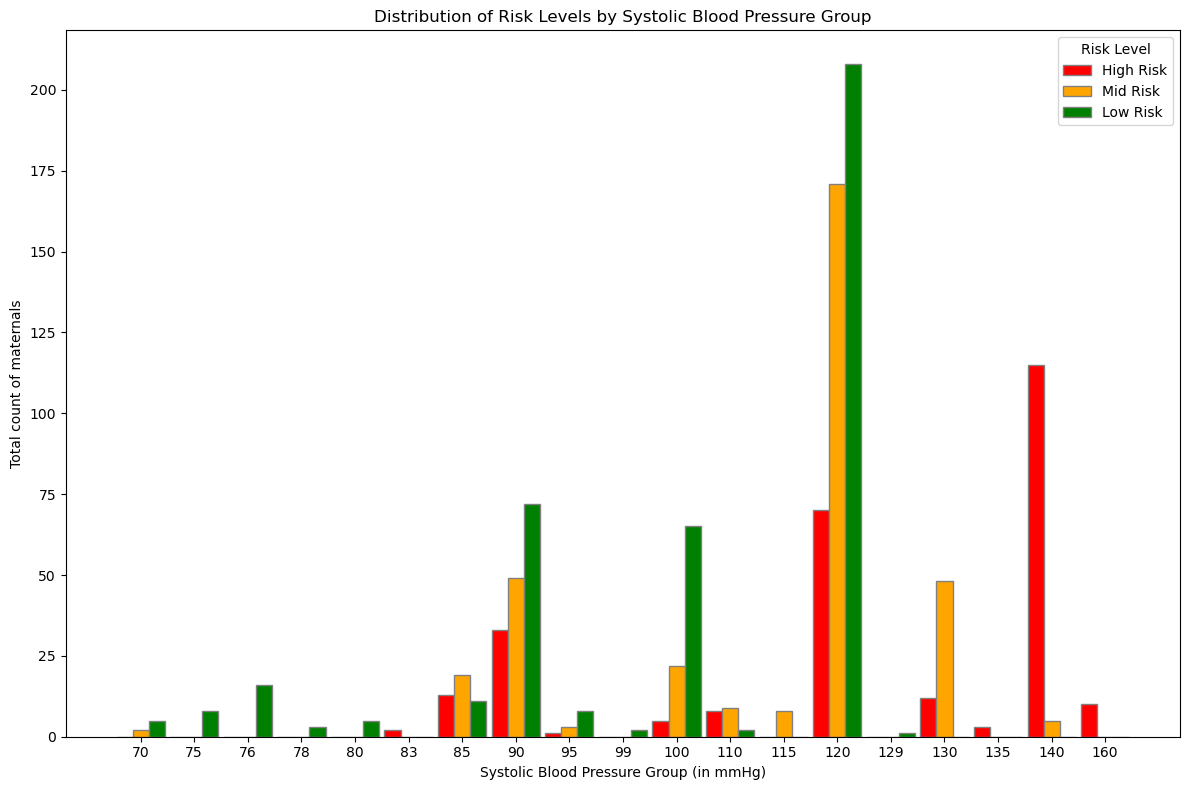

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = {
    'Systolic Blood Pressure Group': [70, 75, 76, 78, 80, 83, 85, 90, 95, 99, 100, 110, 115, 120, 129, 130, 135, 140, 160],
    'high risk': [0, 0, 0, 0, 0, 2, 13, 33, 1, 0, 5, 8, 0, 70, 0, 12, 3, 115, 10],
    'mid risk': [2, 0, 0, 0, 0, 0, 19, 49, 3, 0, 22, 9, 8, 171, 0, 48, 0, 5, 0],
    'low risk': [5, 8, 16, 3, 5, 0, 11, 72, 8, 2, 65, 2, 0, 208, 1, 0, 0, 0, 0]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.3

# Set the position of the bars on the x-axis
r1 = np.arange(len(df['Systolic Blood Pressure Group']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(r1, df['high risk'], color='red', width=bar_width, edgecolor='grey', label='High Risk')
plt.bar(r2, df['mid risk'], color='orange', width=bar_width, edgecolor='grey', label='Mid Risk')
plt.bar(r3, df['low risk'], color='green', width=bar_width, edgecolor='grey', label='Low Risk')

# Add xticks with the names of the Systolic Blood Pressure groups
plt.xlabel('Systolic Blood Pressure Group (in mmHg)')
plt.xticks([r + bar_width for r in range(len(df['Systolic Blood Pressure Group']))], df['Systolic Blood Pressure Group'])
plt.ylabel('Total count of maternals')
plt.title('Distribution of Risk Levels by Systolic Blood Pressure Group')
plt.legend(title='Risk Level')

# Display the plot
plt.tight_layout()
plt.show()

## 2.3.3 Diastolic Blood Pressure

In [21]:
Overview_DiastolicBP = df['Diastolic Blood Pressure'].describe()

print('Overview of Diastolic blood pressure')
print('-----------------------------')
print(Overview_DiastolicBP)
print('-----------------------------')

Overview of Diastolic blood pressure
-----------------------------
count    1014.000000
mean       76.460552
std        13.885796
min        49.000000
25%        65.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Diastolic Blood Pressure, dtype: float64
-----------------------------


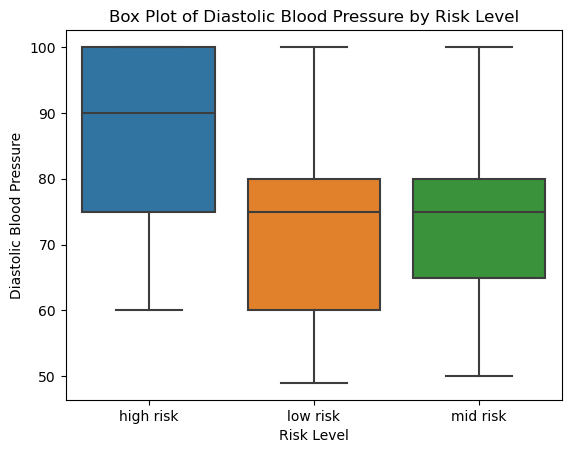

In [22]:
# Box plot
sns.boxplot(x='Risk Level', y='Diastolic Blood Pressure', data=df)
plt.xlabel('Risk Level')
plt.ylabel('Diastolic Blood Pressure')
plt.title('Box Plot of Diastolic Blood Pressure by Risk Level')
plt.show()

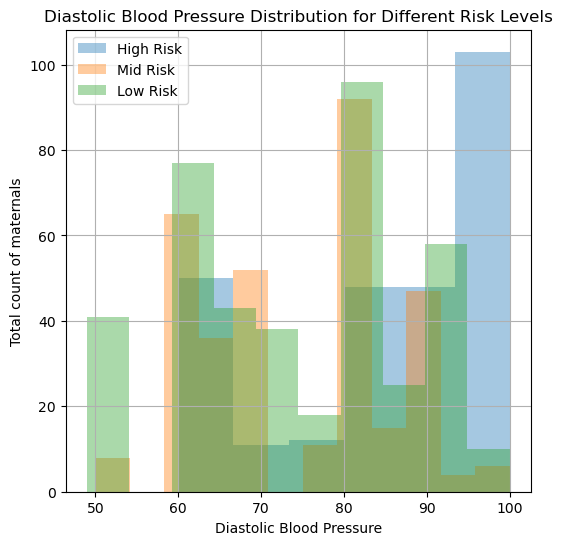

In [23]:
import warnings
warnings.filterwarnings(action='ignore')

# Filtering DataFrame to separate cases with and without heart disease based on the 'RiskLevel' column
diastolic_bp_high_risk = df.loc[df["Risk Level"] == 'high risk']
diastolic_bp_mid_risk = df.loc[df["Risk Level"] == 'mid risk']
diastolic_bp_low_risk = df.loc[df["Risk Level"] == 'low risk']

# Plotting the distribution of diastolic blood pressure for different risk levels
plt.figure(figsize=(6,6))
sns.distplot(diastolic_bp_high_risk["Diastolic Blood Pressure"], kde=False)
sns.distplot(diastolic_bp_mid_risk["Diastolic Blood Pressure"], kde=False)
sns.distplot(diastolic_bp_low_risk["Diastolic Blood Pressure"], kde=False)

# Adding legend and labels
plt.legend(["High Risk", "Mid Risk", "Low Risk"])
plt.title('Diastolic Blood Pressure Distribution for Different Risk Levels')
plt.ylabel('Total count of maternals')
plt.xlabel('Diastolic Blood Pressure')
plt.grid()

# Displaying the plot
plt.show()

In [24]:
# Grouping data by diastolic blood pressure (DiastolicBP) and risk level and counting occurrences
diastolic_bp_risklevel_counts = df.groupby(['Diastolic Blood Pressure', 'Risk Level']).size().unstack(fill_value=0)

# Loop through each diastolic blood pressure group
for diastolic_bp_group, row in diastolic_bp_risklevel_counts.iterrows():
    print(f"Diastolic Blood Pressure Group: {diastolic_bp_group}")
    print("-----------------------")
    # Print count of each risk level for the current diastolic blood pressure group
    print(f"high risk: {row['high risk']}")
    print(f"mid risk: {row['mid risk']}")
    print(f"low risk: {row['low risk']}")
    print("\n")

Diastolic Blood Pressure Group: 49
-----------------------
high risk: 0
mid risk: 0
low risk: 25


Diastolic Blood Pressure Group: 50
-----------------------
high risk: 0
mid risk: 8
low risk: 16


Diastolic Blood Pressure Group: 60
-----------------------
high risk: 34
mid risk: 65
low risk: 75


Diastolic Blood Pressure Group: 63
-----------------------
high risk: 2
mid risk: 4
low risk: 2


Diastolic Blood Pressure Group: 65
-----------------------
high risk: 14
mid risk: 32
low risk: 41


Diastolic Blood Pressure Group: 68
-----------------------
high risk: 0
mid risk: 0
low risk: 2


Diastolic Blood Pressure Group: 69
-----------------------
high risk: 1
mid risk: 0
low risk: 0


Diastolic Blood Pressure Group: 70
-----------------------
high risk: 10
mid risk: 52
low risk: 38


Diastolic Blood Pressure Group: 75
-----------------------
high risk: 12
mid risk: 11
low risk: 15


Diastolic Blood Pressure Group: 76
-----------------------
high risk: 0
mid risk: 0
low risk: 3


Diasto

In [25]:
# Grouping data by diastolic blood pressure (DiastolicBP) and risk level and counting occurrences
bp_risklevel_counts = df.groupby(['Diastolic Blood Pressure', 'Risk Level']).size().unstack(fill_value=0)

# Loop through each diastolic blood pressure group
for bp_group, row in bp_risklevel_counts.iterrows():
    total_count = row.sum()  # Total count for the current diastolic blood pressure group
    print(f"Diastolic Blood Pressure Group: {bp_group}")
    print("-----------------------")
    # Print percentage of each risk level for the current diastolic blood pressure group
    print(f"high risk: {row['high risk'] / total_count * 100:.2f}%")
    print(f"mid risk: {row['mid risk'] / total_count * 100:.2f}%")
    print(f"low risk: {row['low risk'] / total_count * 100:.2f}%")
    print("\n")

Diastolic Blood Pressure Group: 49
-----------------------
high risk: 0.00%
mid risk: 0.00%
low risk: 100.00%


Diastolic Blood Pressure Group: 50
-----------------------
high risk: 0.00%
mid risk: 33.33%
low risk: 66.67%


Diastolic Blood Pressure Group: 60
-----------------------
high risk: 19.54%
mid risk: 37.36%
low risk: 43.10%


Diastolic Blood Pressure Group: 63
-----------------------
high risk: 25.00%
mid risk: 50.00%
low risk: 25.00%


Diastolic Blood Pressure Group: 65
-----------------------
high risk: 16.09%
mid risk: 36.78%
low risk: 47.13%


Diastolic Blood Pressure Group: 68
-----------------------
high risk: 0.00%
mid risk: 0.00%
low risk: 100.00%


Diastolic Blood Pressure Group: 69
-----------------------
high risk: 100.00%
mid risk: 0.00%
low risk: 0.00%


Diastolic Blood Pressure Group: 70
-----------------------
high risk: 10.00%
mid risk: 52.00%
low risk: 38.00%


Diastolic Blood Pressure Group: 75
-----------------------
high risk: 31.58%
mid risk: 28.95%
low ri

<Figure size 1200x800 with 0 Axes>

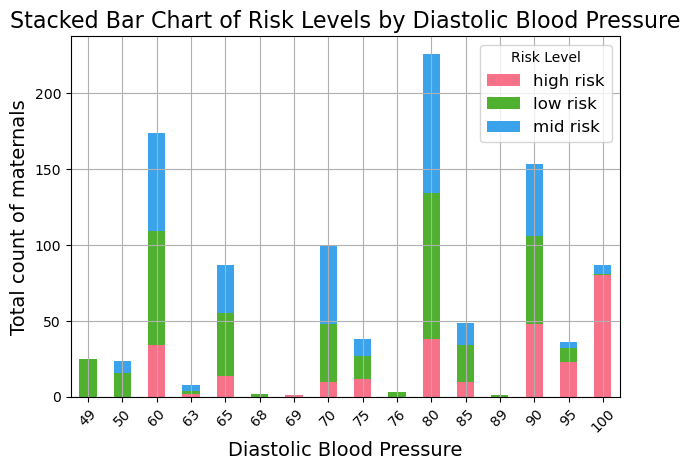

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping data by diastolic blood pressure (DiastolicBP) and RiskLevel, and counting occurrences
grouped_data = df.groupby(['Diastolic Blood Pressure', 'Risk Level']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))  # Adjusting figure size
colors = sns.color_palette("husl", len(grouped_data.columns)) 
grouped_data.plot(kind='bar', stacked=True, color=colors)

# Adding legend and labels
plt.title('Stacked Bar Chart of Risk Levels by Diastolic Blood Pressure', fontsize=16)
plt.ylabel('Total count of maternals', fontsize=14) 
plt.xlabel('Diastolic Blood Pressure', fontsize=14)  
plt.xticks(rotation=45)  
plt.legend(title='Risk Level', fontsize=12)  
plt.grid(True)  

# Displaying the plot
plt.tight_layout()  
plt.show()

### 2.3.4 Blood Sugar

In [27]:
bs = df['Blood Sugar'].value_counts()
print(bs)

Blood Sugar
7.50     176
6.90     113
6.80      88
7.00      79
7.90      60
15.00     54
6.10      53
11.00     52
7.80      45
6.70      33
9.00      31
18.00     29
7.70      24
19.00     22
8.00      22
6.00      21
7.20      20
12.00     18
16.00     17
7.01      15
6.40      10
13.00      9
7.10       8
17.00      5
10.00      4
6.30       2
6.60       2
6.50       1
7.60       1
Name: count, dtype: int64


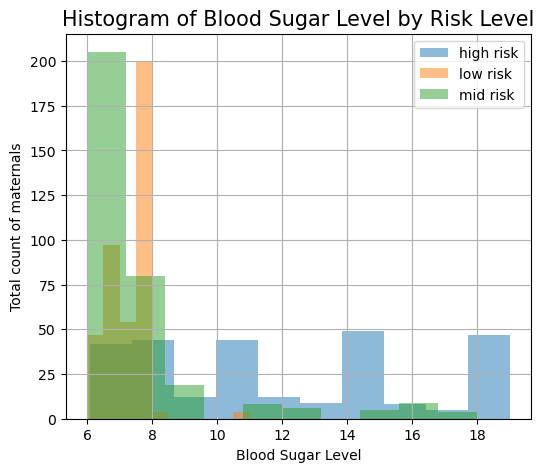

In [28]:
# Count occurrences of RiskLevel (high risk/mid risk/low risk) for each blood sugar level (bs)
bs_risklevel_counts = df.groupby(['Blood Sugar', 'Risk Level']).size().unstack(fill_value=0)

# Plotting count of risk levels for each blood sugar level using separate histograms
plt.figure(figsize=(6, 5))

# Plot histograms for each risk level
for risk_level in bs_risklevel_counts.columns:
    plt.hist(df[df['Risk Level'] == risk_level]['Blood Sugar'], bins=10, alpha=0.5, label=risk_level)

# Adding title and labels
plt.title('Histogram of Blood Sugar Level by Risk Level', fontsize=15)
plt.legend()
plt.xlabel('Blood Sugar Level')
plt.ylabel('Total count of maternals')

# Displaying the plot
plt.grid()
plt.show()

<Figure size 1000x900 with 0 Axes>

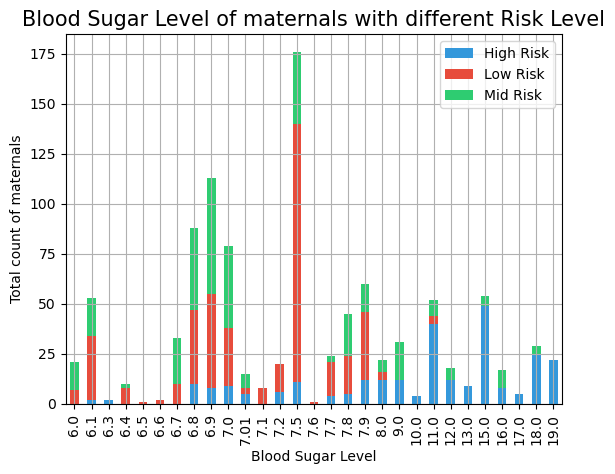

In [29]:
# Count occurrences of RiskLevel (high risk/mid risk/low risk) for each blood sugar level (bs)
bs_risklevel_counts = df.groupby(['Blood Sugar', 'Risk Level']).size().unstack(fill_value=0)

# Plotting count of risk levels for each blood sugar level
plt.figure(figsize=(10,9)) 
bs_risklevel_counts.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c', '#2ecc71'])

# Adding title and labels
plt.title('Blood Sugar Level of maternals with different Risk Level', fontsize=15)
plt.legend(['High Risk', 'Low Risk', 'Mid Risk'])
plt.xlabel('Blood Sugar Level')
plt.ylabel('Total count of maternals')
plt.grid()

# Displaying the plot
plt.show()

In [30]:
# Grouping data by blood sugar level (bs) and risk level (RiskLevel) and counting occurrences
bs_risklevel_counts = df.groupby(['Blood Sugar', 'Risk Level']).size().unstack(fill_value=0)

# Loop through each blood sugar level
for bs_level, row in bs_risklevel_counts.iterrows():
    print(f"Blood Sugar Level: {bs_level}")
    print("-----------------------")
    # Print count of each risk level for the current blood sugar level
    print(f"high risk: {row['high risk']}")
    print(f"mid risk: {row['mid risk']}")
    print(f"low risk: {row['low risk']}")
    print("\n")

Blood Sugar Level: 6.0
-----------------------
high risk: 0
mid risk: 14
low risk: 7


Blood Sugar Level: 6.1
-----------------------
high risk: 2
mid risk: 19
low risk: 32


Blood Sugar Level: 6.3
-----------------------
high risk: 2
mid risk: 0
low risk: 0


Blood Sugar Level: 6.4
-----------------------
high risk: 0
mid risk: 2
low risk: 8


Blood Sugar Level: 6.5
-----------------------
high risk: 0
mid risk: 0
low risk: 1


Blood Sugar Level: 6.6
-----------------------
high risk: 0
mid risk: 0
low risk: 2


Blood Sugar Level: 6.7
-----------------------
high risk: 0
mid risk: 23
low risk: 10


Blood Sugar Level: 6.8
-----------------------
high risk: 10
mid risk: 41
low risk: 37


Blood Sugar Level: 6.9
-----------------------
high risk: 8
mid risk: 58
low risk: 47


Blood Sugar Level: 7.0
-----------------------
high risk: 9
mid risk: 41
low risk: 29


Blood Sugar Level: 7.01
-----------------------
high risk: 5
mid risk: 7
low risk: 3


Blood Sugar Level: 7.1
------------------

### 2.3.5 Body Temperature

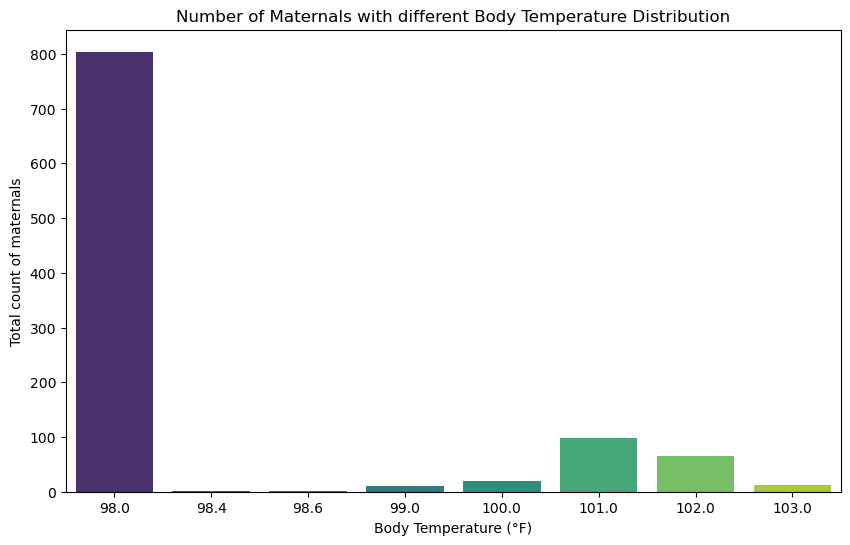

In [31]:
# Define body_temp_counts and body_temps based on your data
body_temp_counts = df['Body Temperature'].value_counts()
body_temps = body_temp_counts.index

# Create horizontal bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=body_temps, y=body_temp_counts, palette='viridis')

# Set labels and title
plt.xlabel('Body Temperature (°F)')
plt.ylabel('Total count of maternals')
plt.title('Number of Maternals with different Body Temperature Distribution')

# Show the plot
plt.show()

In [32]:
BodyTemp = df['Body Temperature'].value_counts() 
print(BodyTemp)

Body Temperature
98.0     804
101.0     98
102.0     66
100.0     20
103.0     13
99.0      10
98.4       2
98.6       1
Name: count, dtype: int64


In [33]:
Body_Temperature = df['Body Temperature'].describe()

print('Overview of Body Temperature')
print('-----------------------------')
print(Body_Temperature)
print('-----------------------------')

Overview of Body Temperature
-----------------------------
count    1014.000000
mean       98.665089
std         1.371384
min        98.000000
25%        98.000000
50%        98.000000
75%        98.000000
max       103.000000
Name: Body Temperature, dtype: float64
-----------------------------


In [34]:
# Grouping data by body temperature (BodyTemp) and risk level (RiskLevel) and counting occurrences
bodytemp_risklevel_counts = df.groupby(['Body Temperature', 'Risk Level']).size().unstack(fill_value=0)

# Loop through each body temperature level
for bodytemp_level, row in bodytemp_risklevel_counts.iterrows():
    print(f"Body Temperature Level: {bodytemp_level}")
    print("-----------------------")
    # Print count of each risk level for the current body temperature level
    print(f"high risk: {row['high risk']}")
    print(f"low risk: {row['low risk']}")
    print(f"mid risk: {row['mid risk']}")
    print("\n")

Body Temperature Level: 98.0
-----------------------
high risk: 199
low risk: 359
mid risk: 246


Body Temperature Level: 98.4
-----------------------
high risk: 0
low risk: 2
mid risk: 0


Body Temperature Level: 98.6
-----------------------
high risk: 1
low risk: 0
mid risk: 0


Body Temperature Level: 99.0
-----------------------
high risk: 2
low risk: 6
mid risk: 2


Body Temperature Level: 100.0
-----------------------
high risk: 5
low risk: 2
mid risk: 13


Body Temperature Level: 101.0
-----------------------
high risk: 34
low risk: 14
mid risk: 50


Body Temperature Level: 102.0
-----------------------
high risk: 25
low risk: 18
mid risk: 23


Body Temperature Level: 103.0
-----------------------
high risk: 6
low risk: 5
mid risk: 2




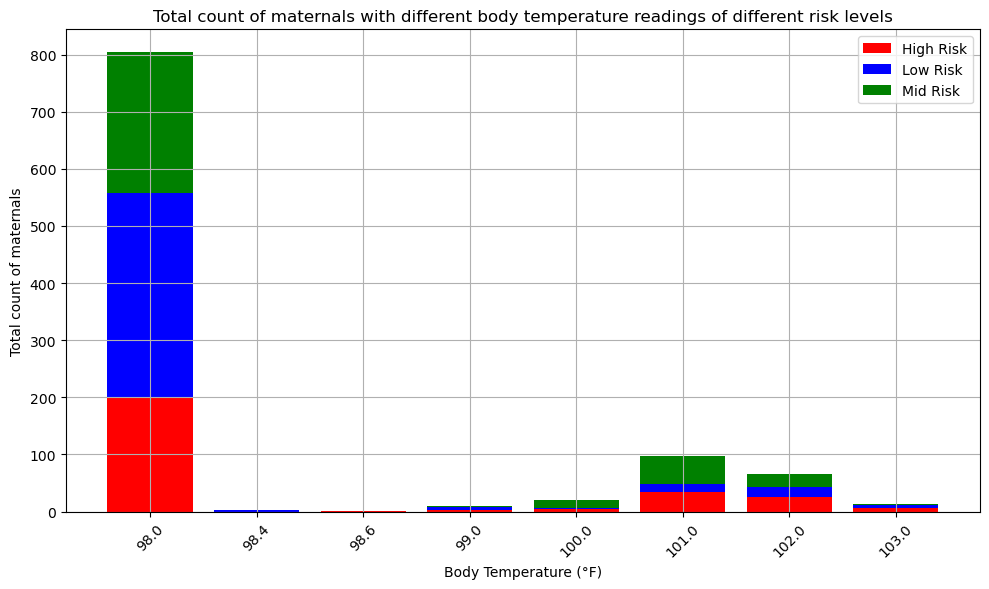

In [35]:
import matplotlib.pyplot as plt

# Grouped data
grouped_data = df.groupby(['Body Temperature', 'Risk Level']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))

# Get x-axis values (body temperature levels)
x_values = range(len(grouped_data.index))

# Plot bars for each risk level, stacked
plt.bar(x_values, grouped_data['high risk'], color='red', label='High Risk')
plt.bar(x_values, grouped_data['low risk'], bottom=grouped_data['high risk'], color='blue', label='Low Risk')
plt.bar(x_values, grouped_data['mid risk'], bottom=grouped_data['high risk']+grouped_data['low risk'], color='green', label='Mid Risk')

# Set x-axis labels
plt.xticks(x_values, grouped_data.index, rotation=45)

plt.xlabel('Body Temperature (°F)')
plt.ylabel('Total count of maternals')
plt.title('Total count of maternals with different body temperature readings of different risk levels')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

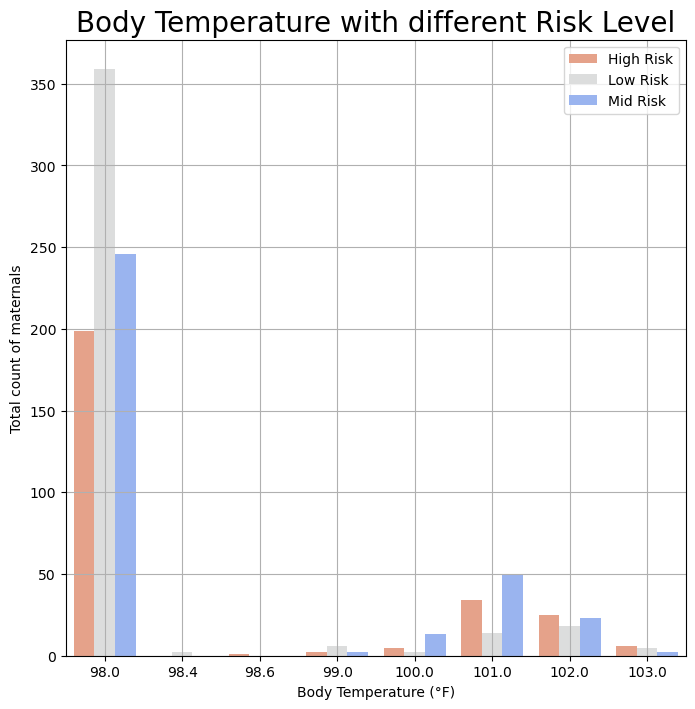

In [36]:
plt.figure(figsize=(8,8)) 
sns.countplot(data=df, x='Body Temperature', hue='Risk Level', palette='coolwarm_r')

plt.legend(['High Risk', 'Low Risk', 'Mid Risk'])

plt.title('Body Temperature with different Risk Level', fontsize=20)
plt.xlabel('Body Temperature (°F)')
plt.ylabel('Total count of maternals')
plt.grid()
plt.show()

### 2.3.6 Heart Rate

In [37]:
Overview_HeartRate= df['Heart Rate'].describe()  

print('Overview of HeartRate')
print('--------------------')
print(Overview_HeartRate)
print('--------------------')

Overview of HeartRate
--------------------
count    1014.000000
mean       74.301775
std         8.088702
min         7.000000
25%        70.000000
50%        76.000000
75%        80.000000
max        90.000000
Name: Heart Rate, dtype: float64
--------------------


In [38]:
# Grouping data by heart rate (HeartRate) and risk level (Risk Level) and counting occurrences
heartrate_risklevel_counts = df.groupby(['Heart Rate', 'Risk Level']).size().unstack(fill_value=0)

# Loop through each hearth rate level
for heartrate_level, row in heartrate_risklevel_counts.iterrows():
    print(f"Heart Rate Level: {heartrate_level}")
    print("-----------------------")
    # Print count of each risk level for the current hearth rate level
    print(f"high risk: {row['high risk']}")
    print(f"low risk: {row['low risk']}")
    print(f"mid risk: {row['mid risk']}")
    print("\n")

Heart Rate Level: 7
-----------------------
high risk: 0
low risk: 2
mid risk: 0


Heart Rate Level: 60
-----------------------
high risk: 20
low risk: 33
mid risk: 21


Heart Rate Level: 65
-----------------------
high risk: 0
low risk: 2
mid risk: 3


Heart Rate Level: 66
-----------------------
high risk: 25
low risk: 44
mid risk: 18


Heart Rate Level: 67
-----------------------
high risk: 5
low risk: 2
mid risk: 5


Heart Rate Level: 68
-----------------------
high risk: 0
low risk: 0
mid risk: 2


Heart Rate Level: 70
-----------------------
high risk: 43
low risk: 126
mid risk: 102


Heart Rate Level: 75
-----------------------
high risk: 6
low risk: 7
mid risk: 6


Heart Rate Level: 76
-----------------------
high risk: 20
low risk: 55
mid risk: 56


Heart Rate Level: 77
-----------------------
high risk: 25
low risk: 56
mid risk: 15


Heart Rate Level: 78
-----------------------
high risk: 9
low risk: 2
mid risk: 35


Heart Rate Level: 80
-----------------------
high risk: 48


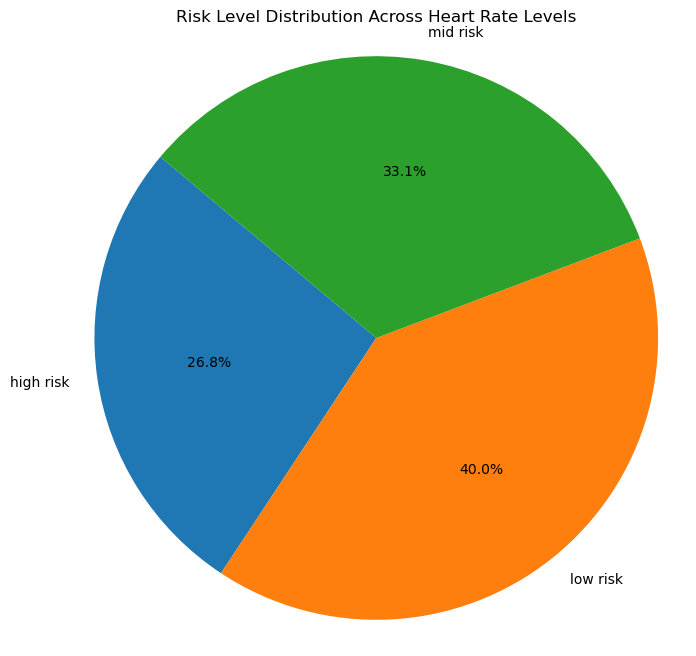

In [39]:
import matplotlib.pyplot as plt

# Grouped data
heartrate_risklevel_counts = df.groupby(['Heart Rate', 'Risk Level']).size().unstack(fill_value=0)

# Summing up counts for each risk level across all heart rate levels
risk_counts = heartrate_risklevel_counts.sum()

# Plot
plt.figure(figsize=(8, 8))

# Pie chart
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Risk Level Distribution Across Heart Rate Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

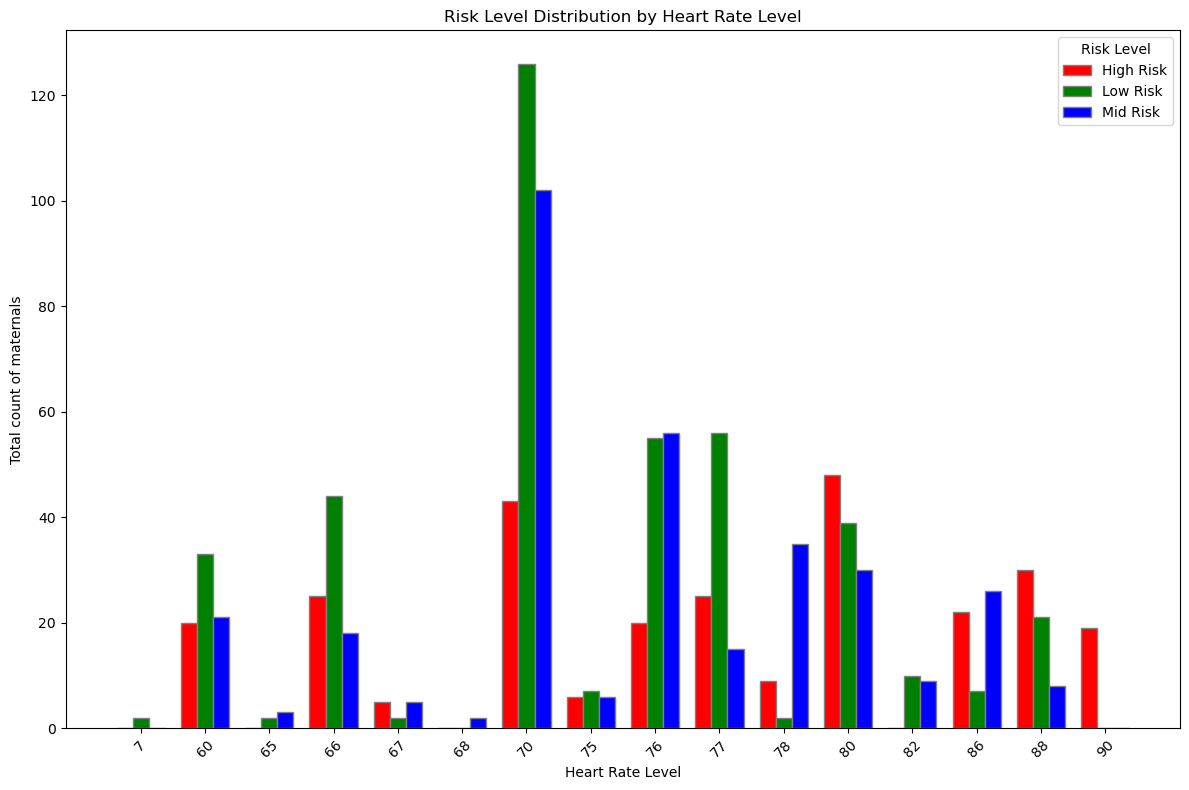

In [40]:
import matplotlib.pyplot as plt

# Data
heart_rate_levels = [7, 60, 65, 66, 67, 68, 70, 75, 76, 77, 78, 80, 82, 86, 88, 90]
high_risk = [0, 20, 0, 25, 5, 0, 43, 6, 20, 25, 9, 48, 0, 22, 30, 19]
low_risk = [2, 33, 2, 44, 2, 0, 126, 7, 55, 56, 2, 39, 10, 7, 21, 0]
mid_risk = [0, 21, 3, 18, 5, 2, 102, 6, 56, 15, 35, 30, 9, 26, 8, 0]

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(heart_rate_levels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(r1, high_risk, color='red', width=bar_width, edgecolor='grey', label='High Risk')
plt.bar(r2, low_risk, color='green', width=bar_width, edgecolor='grey', label='Low Risk')
plt.bar(r3, mid_risk, color='blue', width=bar_width, edgecolor='grey', label='Mid Risk')

# Add xticks
plt.xlabel('Heart Rate Level')
plt.xticks([r + bar_width for r in range(len(heart_rate_levels))], heart_rate_levels)
plt.ylabel('Total count of maternals')
plt.title('Risk Level Distribution by Heart Rate Level')
plt.legend(title='Risk Level')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

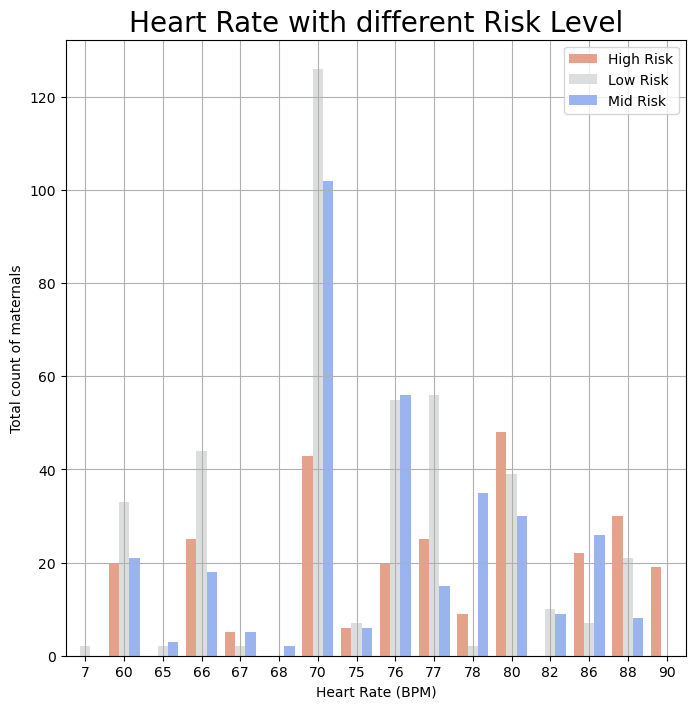

In [41]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(8,8)) 
sns.countplot(data=df, x='Heart Rate', hue='Risk Level', palette='coolwarm_r')

plt.legend(['High Risk', 'Low Risk', 'Mid Risk'])

plt.title('Heart Rate with different Risk Level', fontsize=20)
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Total count of maternals')
plt.grid()
plt.show()

In [42]:
HeartRate = df['Heart Rate'].value_counts()
print(HeartRate)

Heart Rate
70    271
76    131
80    117
77     96
66     87
60     74
88     59
86     55
78     46
90     19
82     19
75     19
67     12
65      5
68      2
7       2
Name: count, dtype: int64


## 2.4 Dependent Variable

### 2.4.1 Risk Level

In [43]:
rl=df.groupby(['Risk Level']).mean()
rl.head()

,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Sugar,Body Temperature,Heart Rate
Risk Level,,,,,,
high risk,36.216912,124.194853,85.073529,12.122610,98.899265,76.742647
low risk,26.869458,105.866995,72.534483,7.220271,98.368966,72.770936
mid risk,28.363095,113.154762,74.232143,7.795744,98.833333,74.175595


In [44]:
RiskLevel = df['Risk Level'].value_counts() 
RiskLevel_total = df['Risk Level'].value_counts().sum()
print(RiskLevel)
print("Total value of RiskLevel:", RiskLevel_total)

Risk Level
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64
Total value of RiskLevel: 1014


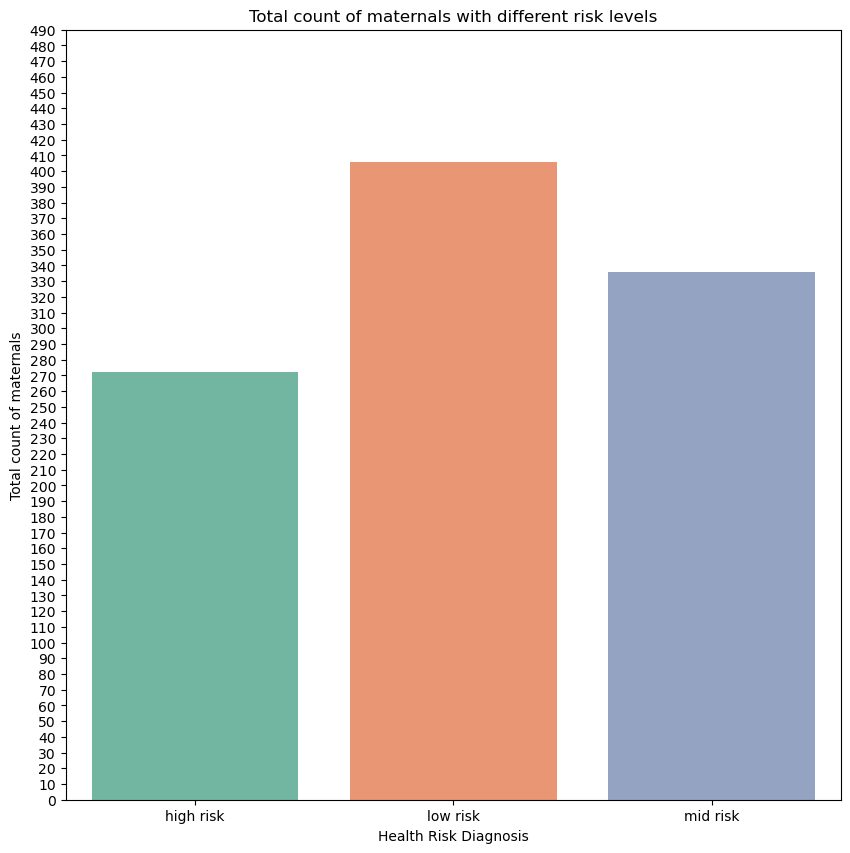

In [45]:
# Print Bar Chart 
plt.figure(figsize=(10,10))
sns.countplot(data = df, x = 'Risk Level', palette = 'Set2')

plt.title("Total count of maternals with different risk levels") 
plt.ylabel("Total count of maternals")
plt.xlabel("Health Risk Diagnosis")
plt.yticks(np.arange(0,500,10))

plt.show()

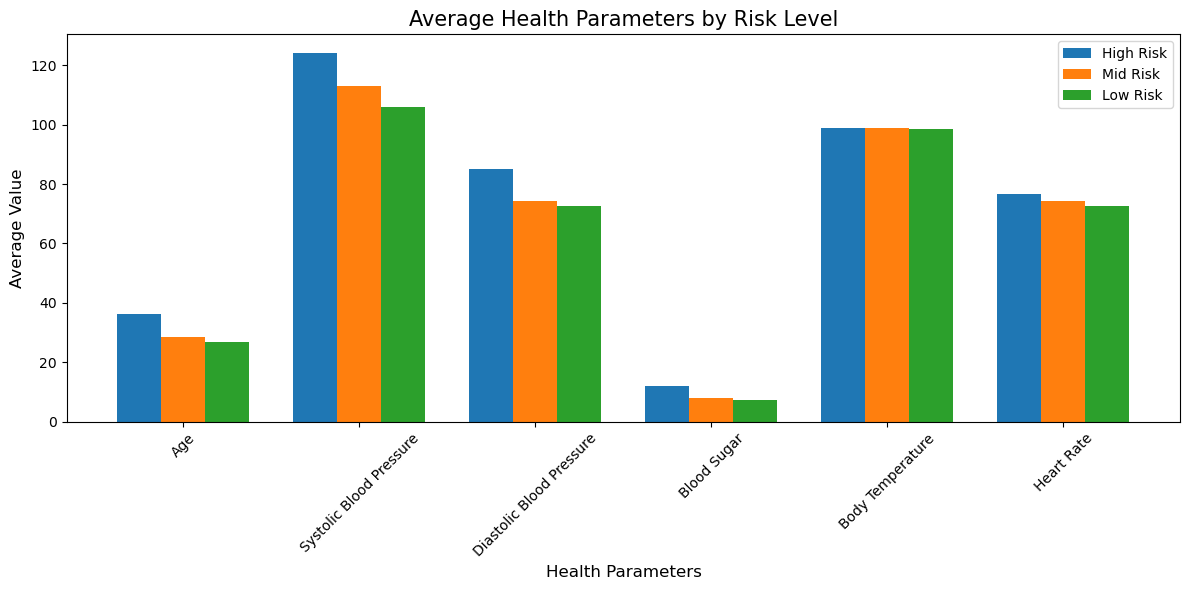

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data
health_parameters = ['Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Blood Sugar', 'Body Temperature', 'Heart Rate']
high_risk = [36.216912, 124.194853, 85.073529, 12.122610, 98.899265, 76.742647]
low_risk = [26.869458, 105.866995, 72.534483, 7.220271, 98.368966, 72.770936]
mid_risk = [28.363095, 113.154762, 74.232143, 7.795744, 98.833333, 74.175595]

# Set the number of parameters and risk levels
num_parameters = len(health_parameters)
num_risk_levels = 3

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
index = np.arange(num_parameters)

# Plotting the bars
plt.figure(figsize=(12, 6))
plt.bar(index, high_risk, bar_width, label='High Risk')
plt.bar(index + bar_width, mid_risk, bar_width, label='Mid Risk')
plt.bar(index + 2 * bar_width, low_risk, bar_width, label='Low Risk')

# Adding labels
plt.xlabel('Health Parameters', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.title('Average Health Parameters by Risk Level', fontsize=15)
plt.xticks(index + bar_width, health_parameters, rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

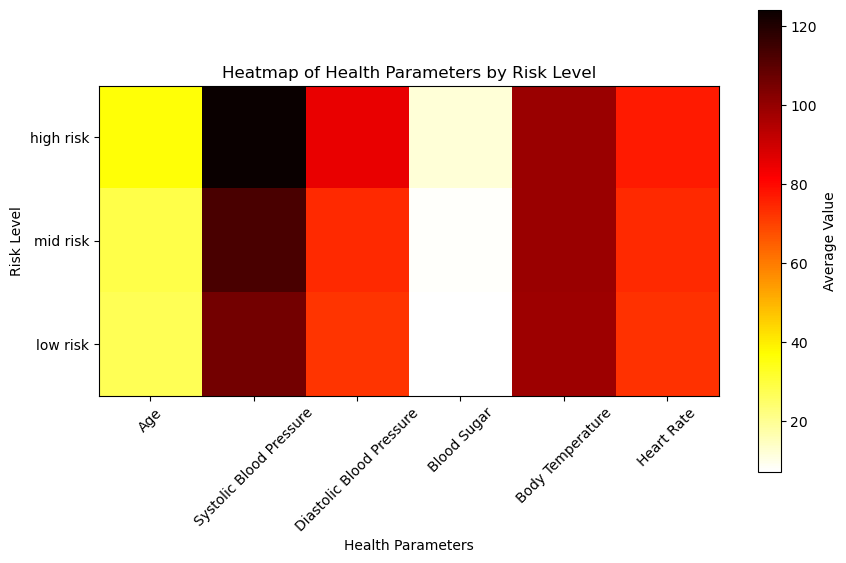

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Provided data
data = {
    'high risk': [36.216912, 124.194853, 85.073529, 12.122610, 98.899265, 76.742647],
    'mid risk': [28.363095, 113.154762, 74.232143, 7.795744, 98.833333, 74.175595],
    'low risk': [26.869458, 105.866995, 72.534483, 7.220271, 98.368966, 72.770936]
}

# Define parameters
parameters = ['Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Blood Sugar', 'Body Temperature', 'Heart Rate']
risk_levels = list(data.keys())

# Converting data to a numpy array for plotting
heatmap_data = np.array([[data[risk][param_index] for param_index in range(len(parameters))] for risk in risk_levels])

plt.figure(figsize=(10, 6))
# Reversing the colormap
plt.imshow(heatmap_data, cmap='hot_r', interpolation='nearest')

# Adding colorbar
plt.colorbar(label='Average Value')

# Adding labels
plt.xticks(np.arange(len(parameters)), parameters, rotation=45)
plt.yticks(np.arange(len(risk_levels)), risk_levels)

plt.xlabel('Health Parameters')
plt.ylabel('Risk Level')

plt.title('Heatmap of Health Parameters by Risk Level')

plt.show()

## 2.5 Data Selection

### 2.5.1 Handling Missing Values

In [48]:
# Check missing values
df.isnull().sum()

Age                         0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Blood Sugar                 0
Body Temperature            0
Heart Rate                  0
Risk Level                  0
dtype: int64

In [49]:
df.isnull().any()

Age                         False
Systolic Blood Pressure     False
Diastolic Blood Pressure    False
Blood Sugar                 False
Body Temperature            False
Heart Rate                  False
Risk Level                  False
dtype: bool

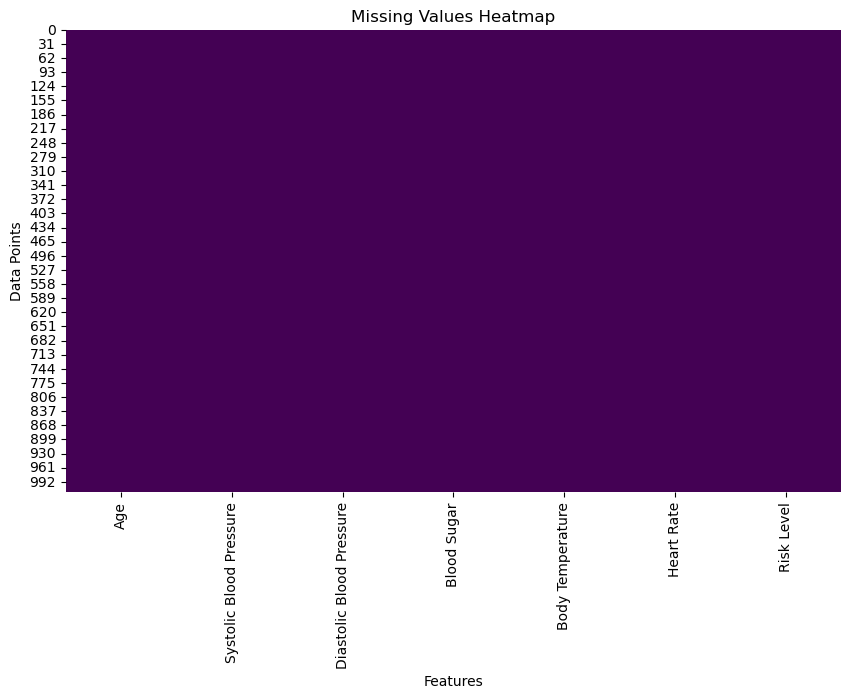

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a missing values dataframe
missing_data = df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')
plt.show()

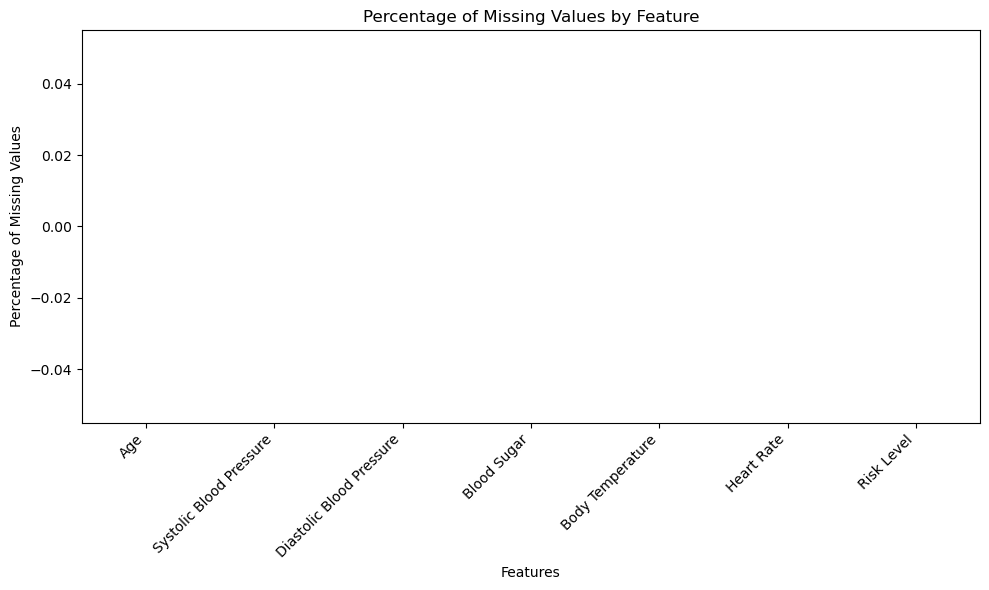

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the percentage of missing values in each feature
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Sort the features based on the percentage of missing values
missing_percentages = missing_percentages.sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
missing_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
# how many total missing values
total_cell = np.product(df.shape)              
total_missing = df.isnull().sum().sum()         

# percent of data that is missing
percent_missing = (total_missing/total_cell) * 100

print("Percentage of missing value: {:.2f}%".format(percent_missing))

Percentage of missing value: 0.00%


In [53]:
# Print the info in the DataFrame
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1014 non-null   int64  
 1   Systolic Blood Pressure   1014 non-null   int64  
 2   Diastolic Blood Pressure  1014 non-null   int64  
 3   Blood Sugar               1014 non-null   float64
 4   Body Temperature          1014 non-null   float64
 5   Heart Rate                1014 non-null   int64  
 6   Risk Level                1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


(1014, 7)

### 2.5.2 Outlier Detection

<Axes: >

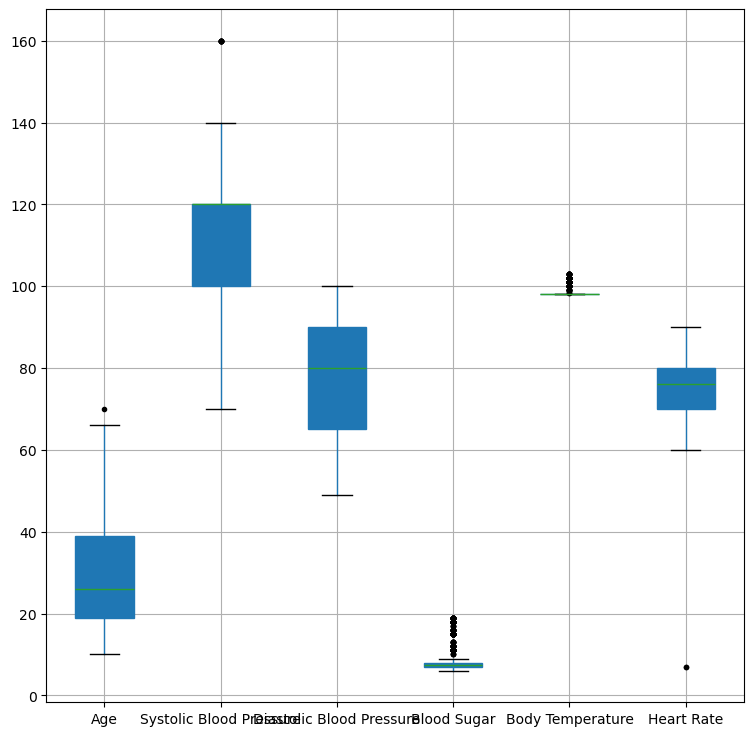

In [54]:
# Detect outliers
import matplotlib.pyplot as plt

plt.subplots(figsize=(9,9))
df.boxplot(patch_artist=True, sym="k.")

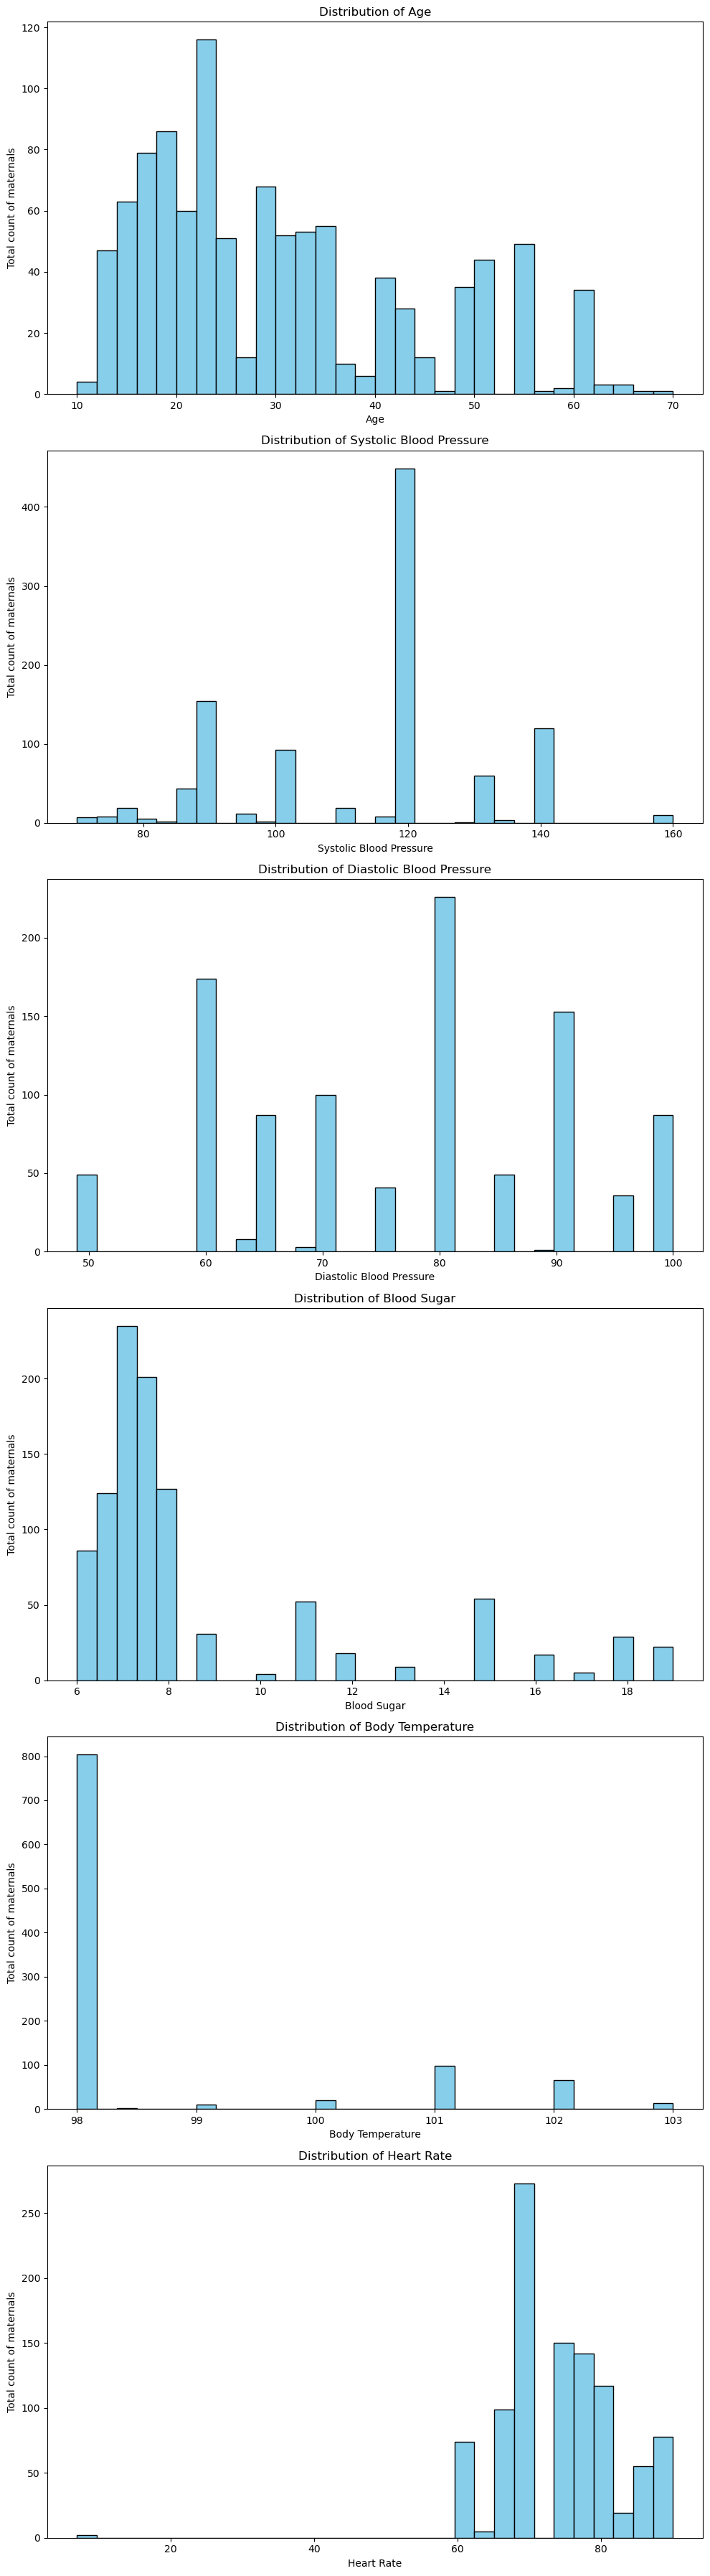

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Visualize the distribution of numerical features using histograms
numerical_features = ['Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Blood Sugar', 'Body Temperature', 'Heart Rate']

# Create subplots for each numerical feature
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(10, 6 * len(numerical_features)))

# Plot histograms for each feature
for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Total count of maternals')

plt.tight_layout()
plt.show()


# 3.0 Data Preparation

### 3.1 Data Cleaning

### 3.1.1 Remove Outlier

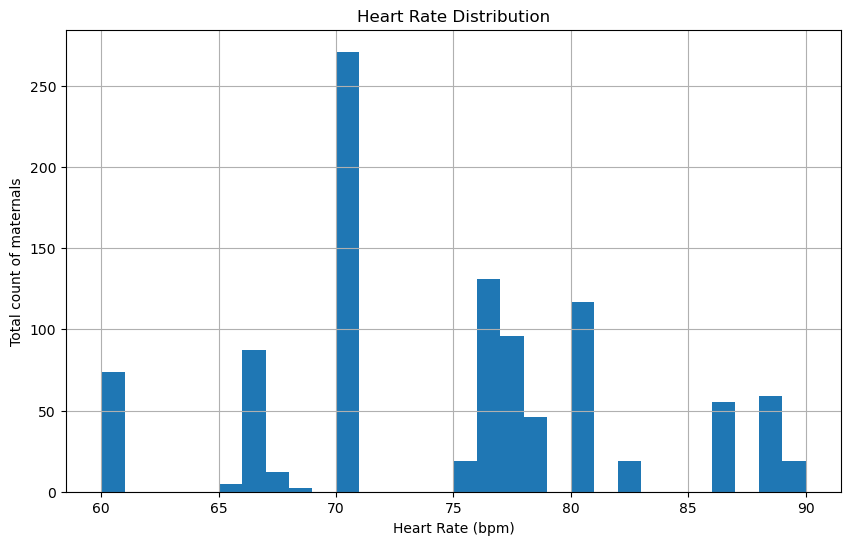

In [57]:
# Remove the outliers with heart rate 7 bpm
df = df[df['Heart Rate'] != 7]

# Plot the heart rate distribution
plt.figure(figsize=(10, 6))
df['Heart Rate'].hist(bins=30)
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Total count of maternals')
plt.title('Heart Rate Distribution')
plt.show()

In [58]:
df

,Age,Systolic Blood Pressure,Diastolic Blood Pressure,Blood Sugar,Body Temperature,Heart Rate,Risk Level
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


### 3.2 Data Transformation

### 3.2.1 Categorical Variable Encoding

In [59]:
# Categorical variable encoding
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Encode the 'RiskLevel' column
df['Risk_Level_encoded'] = le.fit_transform(df['Risk Level'])

print(f"Categorical value for Risk Level: [High Risk, Low Risk, Mid Risk]")
# Check the encoded values
print(f"Encoded value for Risk Level    :", df['Risk_Level_encoded'].unique())

Categorical value for Risk Level: [High Risk, Low Risk, Mid Risk]
Encoded value for Risk Level    : [0 1 2]


In [60]:
print(df)

      Age  Systolic Blood Pressure  Diastolic Blood Pressure  Blood Sugar  \
0      25                      130                        80         15.0   
1      35                      140                        90         13.0   
2      29                       90                        70          8.0   
3      30                      140                        85          7.0   
4      35                      120                        60          6.1   
...   ...                      ...                       ...          ...   
1009   22                      120                        60         15.0   
1010   55                      120                        90         18.0   
1011   35                       85                        60         19.0   
1012   43                      120                        90         18.0   
1013   32                      120                        65          6.0   

      Body Temperature  Heart Rate Risk Level  Risk_Level_encoded  
0      

### 3.2.2 Feature Scaling

In [61]:
# import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select all numeric features
numeric_features = ['Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Blood Sugar', 'Body Temperature', 'Heart Rate']

# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
df_scaled_minmax = df.copy()
df_scaled_minmax[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display the original and scaled datasets
print("Original Dataset:")
print(df[numeric_features])

print("\nMin-Max Scaled Dataset:")
print(df_scaled_minmax[numeric_features])

Original Dataset:
      Age  Systolic Blood Pressure  Diastolic Blood Pressure  Blood Sugar  \
0      25                      130                        80         15.0   
1      35                      140                        90         13.0   
2      29                       90                        70          8.0   
3      30                      140                        85          7.0   
4      35                      120                        60          6.1   
...   ...                      ...                       ...          ...   
1009   22                      120                        60         15.0   
1010   55                      120                        90         18.0   
1011   35                       85                        60         19.0   
1012   43                      120                        90         18.0   
1013   32                      120                        65          6.0   

      Body Temperature  Heart Rate  
0                 98

In [62]:
df.drop(['Risk Level'], axis=1, inplace=True)
print(df)

      Age  Systolic Blood Pressure  Diastolic Blood Pressure  Blood Sugar  \
0      25                      130                        80         15.0   
1      35                      140                        90         13.0   
2      29                       90                        70          8.0   
3      30                      140                        85          7.0   
4      35                      120                        60          6.1   
...   ...                      ...                       ...          ...   
1009   22                      120                        60         15.0   
1010   55                      120                        90         18.0   
1011   35                       85                        60         19.0   
1012   43                      120                        90         18.0   
1013   32                      120                        65          6.0   

      Body Temperature  Heart Rate  Risk_Level_encoded  
0                 

### 3.3 Data Combination

In [63]:
# Create a DataFrame containing only the scaled values of the continuous columns
df_scaled_numeric = df_scaled_minmax[numeric_features]

# Concatenate the scaled numeric DataFrame with the "Risk Level" columns
df_combined = pd.concat([df_scaled_numeric, df[['Risk_Level_encoded']]], axis=1)

# Reorder the columns to match the desired order
columns_order = ['Age', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Blood Sugar', 'Body Temperature', 'Heart Rate', 
                 'Risk_Level_encoded']
df_combined = df_combined[columns_order]

print(df_combined)

           Age  Systolic Blood Pressure  Diastolic Blood Pressure  \
0     0.250000                 0.666667                  0.607843   
1     0.416667                 0.777778                  0.803922   
2     0.316667                 0.222222                  0.411765   
3     0.333333                 0.777778                  0.705882   
4     0.416667                 0.555556                  0.215686   
...        ...                      ...                       ...   
1009  0.200000                 0.555556                  0.215686   
1010  0.750000                 0.555556                  0.803922   
1011  0.416667                 0.166667                  0.215686   
1012  0.550000                 0.555556                  0.803922   
1013  0.366667                 0.555556                  0.313725   

      Blood Sugar  Body Temperature  Heart Rate  Risk_Level_encoded  
0        0.692308               0.0    0.866667                   0  
1        0.538462              

### 3.4 Splitting Dataset into Training and Testing Set

In [64]:
from sklearn.model_selection import train_test_split

# Separate the features and target variable
X = df_combined.drop(['Risk_Level_encoded'], axis=1)
y = df_combined[['Risk_Level_encoded']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the splits
print(f"Training Set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test Set: X_test={X_test.shape}, y_test={y_test.shape}")

Training Set: X_train=(708, 6), y_train=(708, 1)
Test Set: X_test=(304, 6), y_test=(304, 1)


# 4.0 Modeling

## 4.1 Decision Trees

### 4.1.1 Decision Tree accuracy  test set and training set

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the decision tree classifier
model_dt = DecisionTreeClassifier(    criterion='gini',  # Try using Gini impurity as the criterion
    max_depth=14,      # Experiment with a higher max_depth
    min_samples_split=5,  # Experiment with a smaller min_samples_split
    min_samples_leaf=2,   # Experiment with a smaller min_samples_leaf
    random_state=42)

# Fit the model on the training data
model_dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model_dt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy))

# Print classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 75.00%
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        72
           1       0.80      0.74      0.77       127
           2       0.70      0.66      0.68       105

    accuracy                           0.75       304
   macro avg       0.75      0.77      0.75       304
weighted avg       0.75      0.75      0.75       304



In [66]:
# Calculate accuracy
dt_acc_test = model_dt.score(X_test, y_test) * 100
dt_acc_train = model_dt.score(X_train, y_train) * 100

# Print accuracy
print("Decision Tree accuracy for test set: {:.2f}%".format(dt_acc_test))
print("Decision Tree accuracy for training set: {:.2f}%".format(dt_acc_train))

Decision Tree accuracy for test set: 75.00%
Decision Tree accuracy for training set: 90.54%


### 4.1.2 Confusion Matrix

Confusion Matrix:
 [[65  1  6]
 [ 9 94 24]
 [14 22 69]]


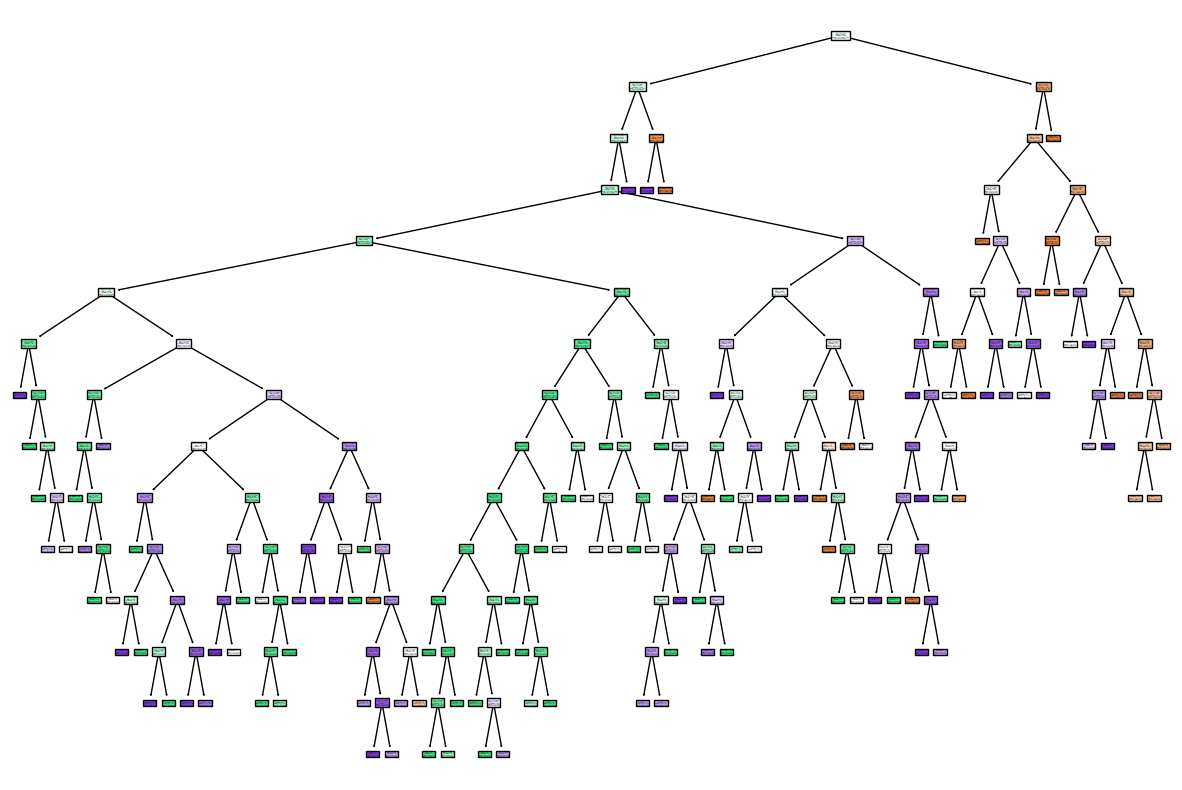

In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(    criterion='gini',  # Try using Gini impurity as the criterion
    max_depth=14,      # Experiment with a higher max_depth
    min_samples_split=5,  # Experiment with a smaller min_samples_split
    min_samples_leaf=2,   # Experiment with a smaller min_samples_leaf
    random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, class_names=['High Risk', 'Low Risk', 'Mid Risk'])
plt.show()





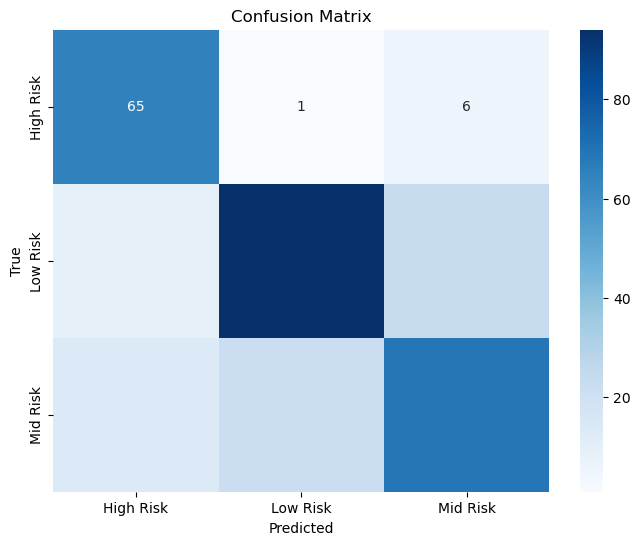

In [68]:

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['High Risk', 'Low Risk', 'Mid Risk'], yticklabels=['High Risk', 'Low Risk', 'Mid Risk'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



### 4.1.3 Entropy for Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Initialize the decision tree classifier
model_dt = DecisionTreeClassifier(
    criterion='gini',             # Using Gini impurity as the criterion
    max_depth=14,                 # Higher max_depth
    min_samples_split=5,          # Smaller min_samples_split
    min_samples_leaf=2,           # Smaller min_samples_leaf
    random_state=42
)

# Fit the model on the training data
model_dt.fit(X_train, y_train)

# Predict on the testing data
y_pred = model_dt.predict(X_test)

# Calculate the entropy for the predicted labels
unique_labels, label_counts = np.unique(y_pred, return_counts=True)
label_proportions = label_counts / len(y_pred)
entropy_value = -np.sum(label_proportions * np.log2(label_proportions))

print("Entropy for Decision Tree:", entropy_value)

Entropy for Decision Tree: 1.57500330285404


### 4.1.4 Decision Tree Precision, Recall and F1-score

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Initialize Decision Tree classifier
dt_clf =DecisionTreeClassifier(    criterion='gini',  # Try using Gini impurity as the criterion
    max_depth=14,      # Experiment with a higher max_depth
    min_samples_split=5,  # Experiment with a smaller min_samples_split
    min_samples_leaf=2,   # Experiment with a smaller min_samples_leaf
    random_state=42)


# Train the classifier
dt_clf.fit(X_train, y_train)

# Predict on the testing set
y_pred_dt = dt_clf.predict(X_test)

# Get the confusion matrix
dt_cm = confusion_matrix(y_test, y_pred_dt)

# Generate and print the classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Calculate precision, recall, and F1-score
dt_precision = precision_score(y_test, y_pred_dt, average='weighted') * 100
dt_recall = recall_score(y_test, y_pred_dt, average='weighted') * 100
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted') * 100

print("Decision Tree Precision: {:.2f}%".format(dt_precision))
print("Decision Tree Recall: {:.2f}%".format(dt_recall))
print("Decision Tree F1-score: {:.2f}%".format(dt_f1))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81        72
           1       0.80      0.74      0.77       127
           2       0.70      0.66      0.68       105

    accuracy                           0.75       304
   macro avg       0.75      0.77      0.75       304
weighted avg       0.75      0.75      0.75       304

Decision Tree Precision: 75.13%
Decision Tree Recall: 75.00%
Decision Tree F1-score: 74.80%


### 4.1.5 Decision Tree AUC

In [71]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for the test set
y_prob_dt = dt_clf.predict_proba(X_test)

# Compute AUC score for each class
auc_scores = []
for i in range(len(dt_clf.classes_)):
    auc_score = roc_auc_score((y_test == dt_clf.classes_[i]).astype(int), y_prob_dt[:, i])
    auc_scores.append(auc_score)

# Average AUC scores
dt_auc = sum(auc_scores) / len(auc_scores)
print("Decision Tree Average AUC Score:", dt_auc)


Decision Tree Average AUC Score: 0.8881057297180973


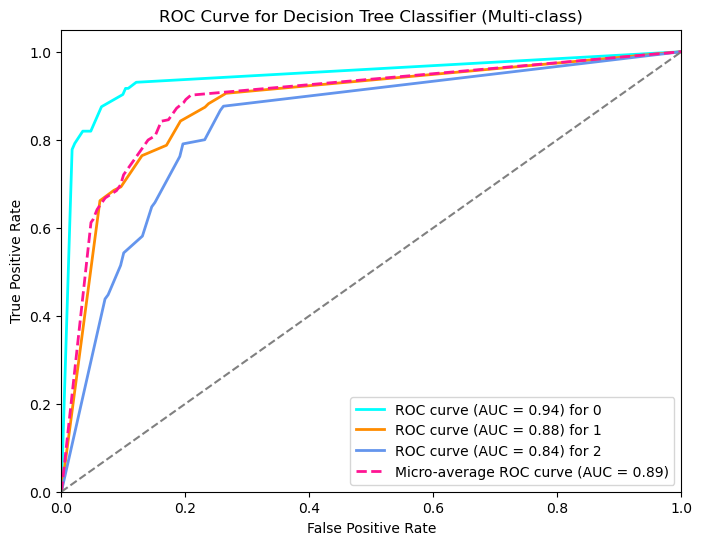

In [72]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Calculate predicted probabilities for each class
y_prob_dt = dt_clf.predict_proba(X_test)

# Binarize the target variable
y_bin = label_binarize(y_test, classes=dt_clf.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(dt_clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob_dt[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_bin.ravel(), y_prob_dt.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(len(dt_clf.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (AUC = {:.2f}) for {}'.format(roc_auc[i], dt_clf.classes_[i]))

plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average ROC curve (AUC = {:.2f})'.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier (Multi-class)')
plt.legend(loc="lower right")
plt.show()

### 4.1.6 Decision Tree Cohen's Kappa Coefficient

In [73]:
from sklearn.metrics import cohen_kappa_score

# Compute Cohen's kappa coefficient matrix
kappa_matrix = np.zeros((len(dt_clf.classes_), len(dt_clf.classes_)))

for i in range(len(dt_clf.classes_)):
    for j in range(len(dt_clf.classes_)):
        kappa_matrix[i, j] = cohen_kappa_score(y_test == dt_clf.classes_[i], y_pred == dt_clf.classes_[j])

# Print the kappa matrix
print("Cohen's Kappa Coefficient Matrix:")
print(kappa_matrix)


Cohen's Kappa Coefficient Matrix:
[[ 0.74644128 -0.3999212  -0.28117048]
 [-0.39248512  0.61707679 -0.24229763]
 [-0.24800955 -0.26082296  0.51331684]]


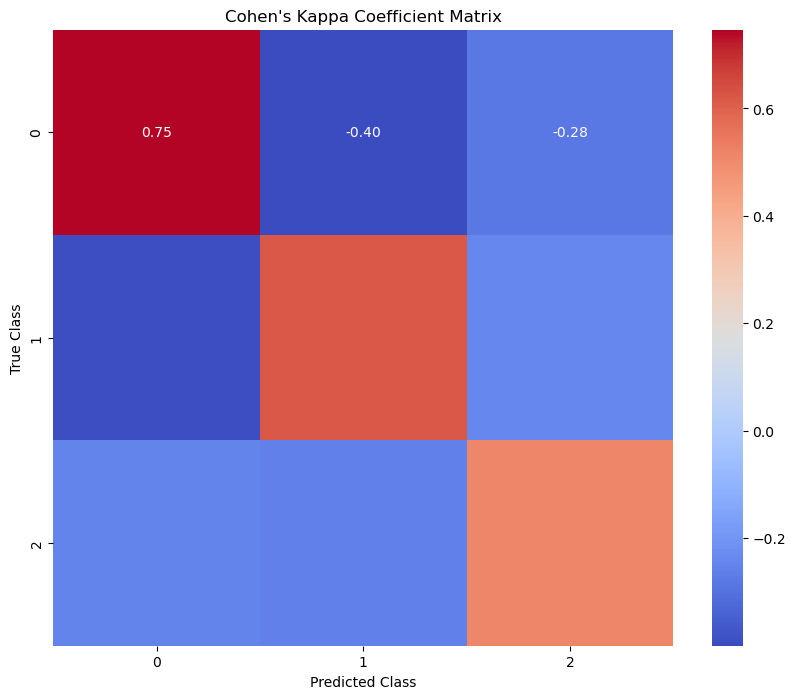

In [74]:
import seaborn as sns

# Create a heatmap of the kappa matrix
plt.figure(figsize=(10, 8))
sns.heatmap(kappa_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)
plt.title("Cohen's Kappa Coefficient Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()



In [75]:
# Print the kappa matrix
print("Cohen's Kappa Coefficient Matrix:")
for i in range(len(dt_clf.classes_)):
    for j in range(len(dt_clf.classes_)):
        print(f"Cohen's kappa coefficient between class {dt_clf.classes_[i]} and class {dt_clf.classes_[j]}: {kappa_matrix[i, j]}")

# Calculate overall agreement
dt_ka = np.mean(np.diag(kappa_matrix))
print(f"Overall Agreement: {dt_ka}")

Cohen's Kappa Coefficient Matrix:
Cohen's kappa coefficient between class 0 and class 0: 0.74644128113879
Cohen's kappa coefficient between class 0 and class 1: -0.3999211977935384
Cohen's kappa coefficient between class 0 and class 2: -0.28117048346055973
Cohen's kappa coefficient between class 1 and class 0: -0.39248511904761885
Cohen's kappa coefficient between class 1 and class 1: 0.6170767915785685
Cohen's kappa coefficient between class 1 and class 2: -0.24229762615363426
Cohen's kappa coefficient between class 2 and class 0: -0.24800955414012726
Cohen's kappa coefficient between class 2 and class 1: -0.26082296472342614
Cohen's kappa coefficient between class 2 and class 2: 0.5133168388880803
Overall Agreement: 0.6256116372018129


### 4.1.7 Decision Tree Mean Square Errror (MSE)

In [76]:
from sklearn.metrics import mean_squared_error

# Assuming y_pred and y_test are arrays of predicted and true values, respectively
dt_mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", dt_mse)


Mean Squared Error (MSE): 0.4473684210526316


# Choosing the Best Scale

Between the 20/80 and 30/70 splits, both are viable options, and the performance difference between them is minimal. However, considering that having more data for training can often lead to better generalization performance, I would recommend choosing the 30/70 split. With this split, you have slightly more data allocated for training, which may help the model learn more robust patterns from the data. Therefore, the 30/70 split might be a slightly better choice for your decision tree model.

# 4.2 Random Forest

### 4.2.1 Random Forest accuracy for test set and training set

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the random forest classifier
modelrf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
modelrf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = modelrf.predict(X_test)

# Calculate accuracy
accuracyrf = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracyrf))

# Print classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 80.92%
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87        72
           1       0.85      0.77      0.81       127
           2       0.75      0.79      0.77       105

    accuracy                           0.81       304
   macro avg       0.81      0.82      0.82       304
weighted avg       0.81      0.81      0.81       304



In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier with optimal parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)  # You can adjust n_estimators as needed

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

# Calculate accuracy
rf_acc_test = accuracy_score(y_test, y_pred_test) * 100
rf_acc_train = accuracy_score(y_train, y_pred_train) * 100

# Print accuracy
print("Random Forest accuracy for test set: {:.2f}%".format(rf_acc_test))
print("Random Forest accuracy for training set: {:.2f}%".format(rf_acc_train))


Random Forest accuracy for test set: 80.92%
Random Forest accuracy for training set: 94.07%


### 4.2.2 Confusion Matrix 

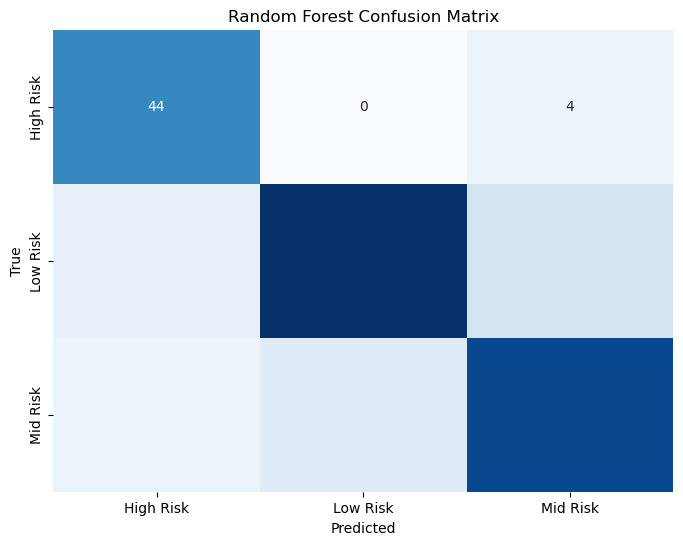

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with optimal parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)  # You can adjust n_estimators as needed

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = rf_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['High Risk', 'Low Risk', 'Mid Risk'], yticklabels=['High Risk', 'Low Risk', 'Mid Risk'], cbar=False)  # Set cbar=False to remove the color bar
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest Confusion Matrix')
plt.show()



In [81]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[44  0  4]
 [ 5 66 12]
 [ 4  8 60]]


### 4.2.3 Out-of-Bag (OOB) Accuracy

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier with optimal parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=1, oob_score=True)  # Enable OOB scoring

# Fit the model on the entire dataset
rf_model.fit(X, y)  # X: input features, y: target labels

# OOB score (accuracy) estimation
oob_accuracy = rf_model.oob_score_
print("Out-of-Bag (OOB) Accuracy:", oob_accuracy)


Out-of-Bag (OOB) Accuracy: 0.8636363636363636


### 4.2.4 Random Forest Precision, Recall and F1-Score 

In [83]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Calculate precision, recall, and F1-score
rf_precision = precision_score(y_test, y_pred_test, average='weighted') * 100
rf_recall = recall_score(y_test, y_pred_test, average='weighted') * 100
rf_f1 = f1_score(y_test, y_pred_test, average='weighted') * 100

# Print precision, recall, and F1-score in percentage form
print("Precision: {:.2f}%".format(rf_precision))
print("Recall: {:.2f}%".format(rf_recall))
print("F1-score: {:.2f}%".format(rf_f1))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        48
           1       0.89      0.80      0.84        83
           2       0.79      0.83      0.81        72

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203

Precision: 84.10%
Recall: 83.74%
F1-score: 83.74%


### 4.2.5 Random Forest AUC

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Initialize the Random Forest classifier with optimal parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)  # You can adjust n_estimators as needed

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Binarize the target variable
y_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes if necessary

# Calculate predicted probabilities for each class
y_prob_rf = rf_model.predict_proba(X_test)

# Calculate ROC AUC score
rf_auc = roc_auc_score(y_bin, y_prob_rf, average='macro')

print("Random Forest AUC (OvR):", rf_auc)


Random Forest AUC (OvR): 0.9399846162949426


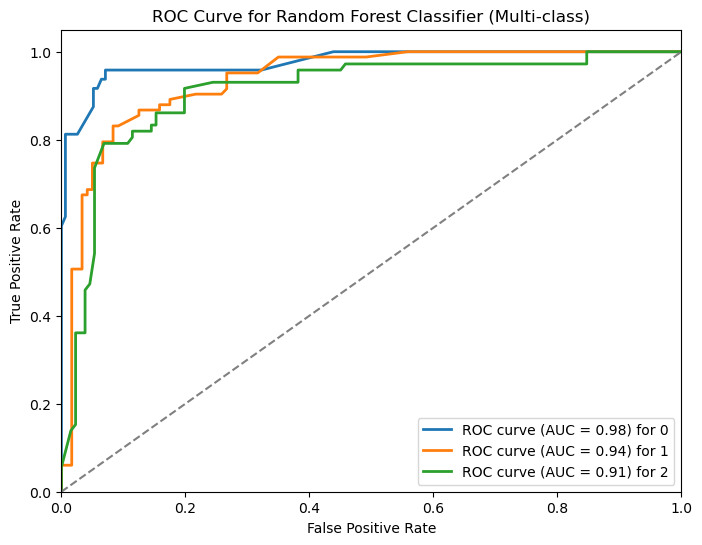

In [85]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Get unique class labels from y_test
classes = np.unique(y_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (AUC = {:.2f}) for {}'.format(roc_auc[i], classes[i]))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier (Multi-class)')
plt.legend(loc="lower right")
plt.show()



### 4.2.6 Random Forest Cohen's Kappa Coefficient 

In [86]:
from sklearn.metrics import cohen_kappa_score

# Initialize an empty matrix to store kappa coefficients
kappa_matrix = np.zeros((len(classes), len(classes)))

# Compute Cohen's kappa coefficient for each class pair
for i in range(len(classes)):
    for j in range(len(classes)):
        kappa_matrix[i, j] = cohen_kappa_score(y_test == classes[i], y_pred_test == classes[j])

# Print the kappa coefficient matrix
print("Kappa Coefficient Matrix:")
print(kappa_matrix)

Kappa Coefficient Matrix:
[[ 0.82880311 -0.40221945 -0.31729693]
 [-0.35980861  0.74089958 -0.3938762 ]
 [-0.33861241 -0.39026446  0.70240838]]


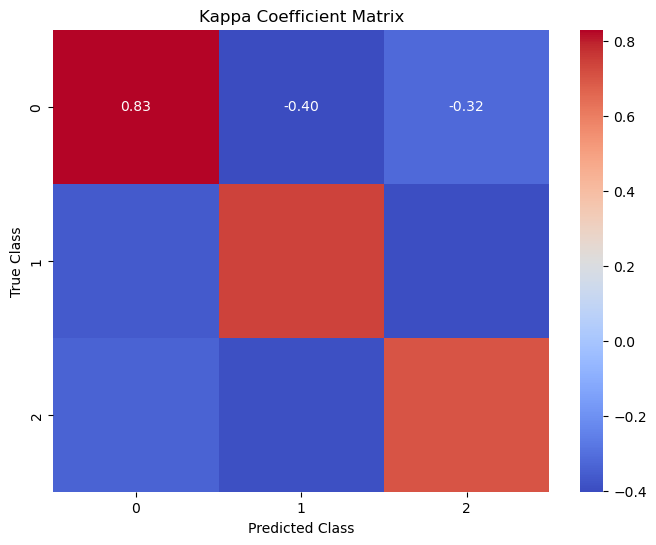

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

# Initialize an empty matrix to store kappa coefficients
kappa_matrix = np.zeros((len(classes), len(classes)))

# Compute Cohen's kappa coefficient for each class pair
for i in range(len(classes)):
    for j in range(len(classes)):
        kappa_matrix[i, j] = cohen_kappa_score(y_test == classes[i], y_pred_test == classes[j])

# Plot the kappa coefficient matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(kappa_matrix, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Kappa Coefficient Matrix")
plt.show()



In [88]:
# from sklearn.metrics import cohen_kappa_score

# Initialize an empty matrix to store kappa coefficients
kappa_matrix_rf = np.zeros((len(classes), len(classes)))

# Compute Cohen's kappa coefficient for each class pair
for i in range(len(classes)):
    for j in range(len(classes)):
        kappa_matrix_rf[i, j] = cohen_kappa_score(y_test == classes[i], y_pred_test == classes[j])

# Print the kappa coefficient matrix for Random Forest
print("Cohen's Kappa Coefficient Matrix (Random Forest):")
for i in range(len(classes)):
    for j in range(len(classes)):
        print(f"Cohen's kappa coefficient between class {classes[i]} and class {classes[j]}: {kappa_matrix_rf[i, j]}")

# Calculate overall agreement
rf_ka = np.mean(np.diag(kappa_matrix_rf))
print(f"Overall Agreement (Random Forest): {rf_ka}")


Cohen's Kappa Coefficient Matrix (Random Forest):
Cohen's kappa coefficient between class 0 and class 0: 0.8288031138501459
Cohen's kappa coefficient between class 0 and class 1: -0.402219454195448
Cohen's kappa coefficient between class 0 and class 2: -0.3172969344372343
Cohen's kappa coefficient between class 1 and class 0: -0.35980861244019136
Cohen's kappa coefficient between class 1 and class 1: 0.7408995762495533
Cohen's kappa coefficient between class 1 and class 2: -0.3938762016174153
Cohen's kappa coefficient between class 2 and class 0: -0.33861241052809565
Cohen's kappa coefficient between class 2 and class 1: -0.39026446106838053
Cohen's kappa coefficient between class 2 and class 2: 0.7024083769633508
Overall Agreement (Random Forest): 0.7573703556876833


### 4.2.7 Random Forest Mean Square Error (MSE) 

In [89]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
rf_mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Random Forest):", rf_mse)


Mean Squared Error (Random Forest): 0.28078817733990147


## 4.3 Gradient Boosting

### 4.3.1 Gradient Boosting accuracy test set and training set

In [90]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Instantiate XGBClassifier
xgb_classifier = XGBClassifier()

# Fit the model to the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

Accuracy: 83.74%
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        48
           1       0.90      0.78      0.84        83
           2       0.78      0.85      0.81        72

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.84       203
weighted avg       0.84      0.84      0.84       203



In [91]:
from sklearn.ensemble import GradientBoostingClassifier

# Create Gradient Boosting model with optimal parameters from GridSearchCV
gradient_boosting = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=5)

# Fit Gradient Boosting model with data
gradient_boosting.fit(X_train, y_train)

# Calculate accuracy
gb_acc_test = gradient_boosting.score(X_test, y_test) * 100
gb_acc_train = gradient_boosting.score(X_train, y_train) * 100

# Print accuracy
print("Gradient Boosting accuracy for test set: {:.2f}%".format(gb_acc_test))
print("Gradient Boosting accuracy for training set: {:.2f}%".format(gb_acc_train))




Gradient Boosting accuracy for test set: 84.73%
Gradient Boosting accuracy for training set: 93.45%


### 4.3.2 Confusion Matrix 

In [92]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = gradient_boosting.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



Confusion Matrix:
[[43  0  5]
 [ 5 68 10]
 [ 4  7 61]]


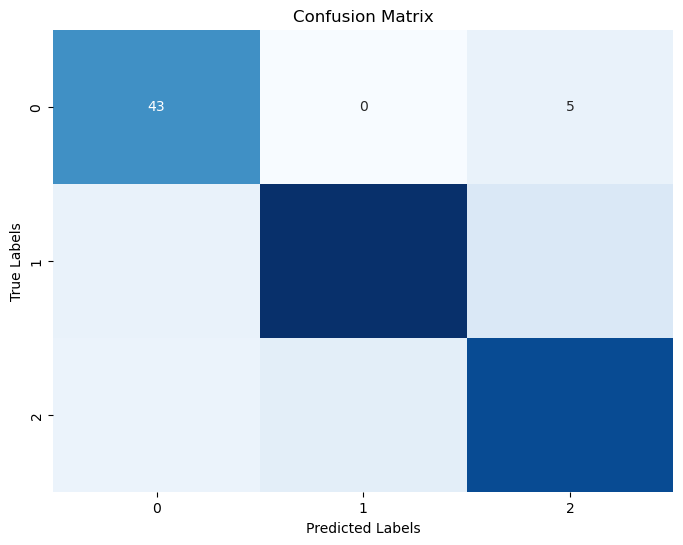

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



### 4.3.4 Gradient Boosting Precision, Recall and F1-score 

In [94]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Make predictions on the test set using Gradient Boosting model
y_pred_gb = gradient_boosting.predict(X_test)

# Print classification report
print("Classification Report:")
report = classification_report(y_test, y_pred_gb)
print(report)

# Calculate precision, recall, and F1-score
gb_precision = precision_score(y_test, y_pred_gb, average='weighted') * 100
gb_recall = recall_score(y_test, y_pred_gb, average='weighted') * 100
gb_f1 = f1_score(y_test, y_pred_gb, average='weighted') * 100

# Print precision, recall, and F1-score in percentage form
print("Precision: {:.2f}%".format(gb_precision))
print("Recall: {:.2f}%".format(gb_recall))
print("F1-score: {:.2f}%".format(gb_f1))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.91      0.82      0.86        83
           2       0.80      0.85      0.82        72

    accuracy                           0.85       203
   macro avg       0.85      0.85      0.85       203
weighted avg       0.85      0.85      0.85       203

Precision: 85.09%
Recall: 84.73%
F1-score: 84.77%


### 4.3.5 Gradient Boosting AUC

In [95]:
from sklearn.metrics import roc_auc_score

# Calculate predicted probabilities for each class
y_prob_gb = gradient_boosting.predict_proba(X_test)

# Calculate ROC AUC score
gb_auc = roc_auc_score(y_test, y_prob_gb, multi_class='ovr', average='macro')

print("Gradient Boosting AUC:", gb_auc)



Gradient Boosting AUC: 0.942438822844526


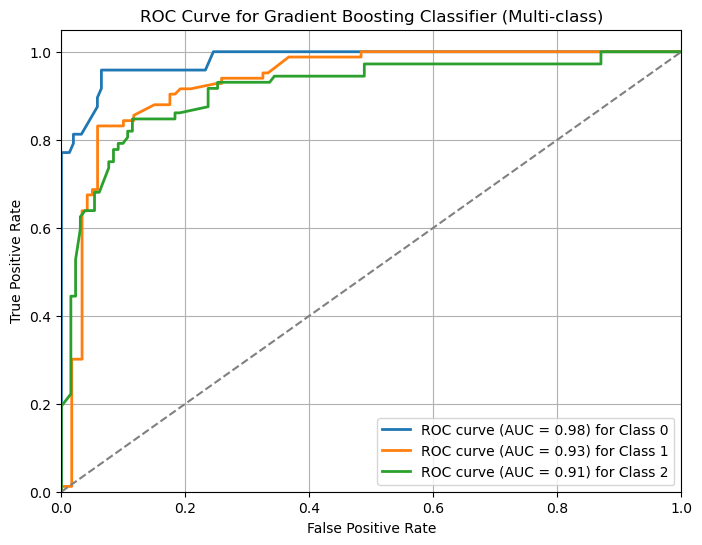

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get unique class labels from y_test
classes = np.unique(y_test)

# Initialize figure and axes
plt.figure(figsize=(8, 6))

# Compute ROC curve and ROC area for each class
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test == classes[i], y_prob_gb[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = {:.2f}) for Class {}'.format(roc_auc, classes[i]))

# Plot random guess line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier (Multi-class)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### 4.3.6 Gradient Boosting Cohen's Kappa Coefficient

Confusion Matrix:
[[43  0  5]
 [ 5 68 10]
 [ 4  7 61]]


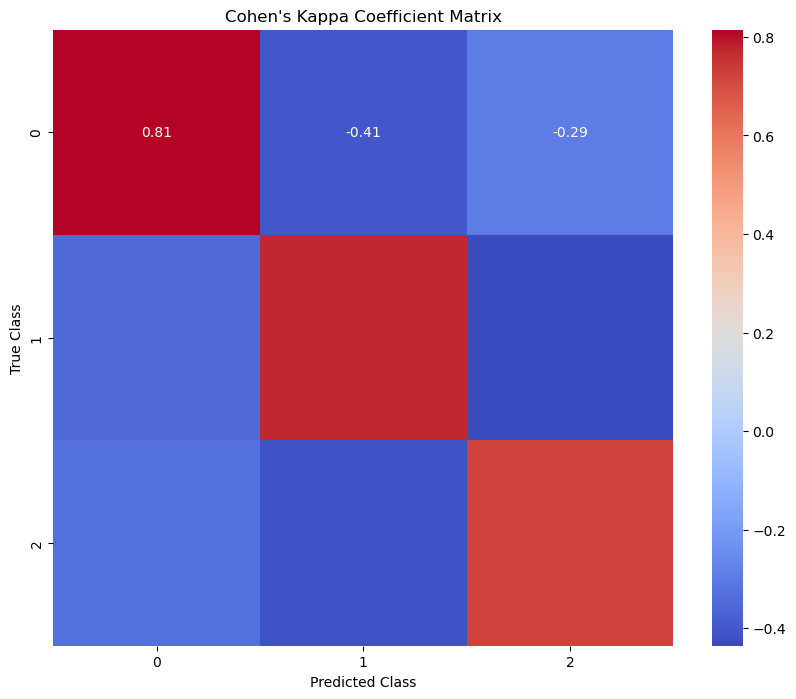

In [97]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, cohen_kappa_score

# Make predictions on the test set
y_pred_gb = gradient_boosting.predict(X_test)

# Get unique class labels from y_test
classes = np.unique(y_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Initialize the Cohen's Kappa coefficient matrix
kappa_matrix = np.zeros((len(classes), len(classes)))

# Calculate Cohen's Kappa coefficient for each class combination
for i in range(len(classes)):
    for j in range(len(classes)):
        kappa_matrix[i, j] = cohen_kappa_score(y_test == classes[i], y_pred_gb == classes[j])

print("Confusion Matrix:")
print(cm)


# Create a heatmap for the Cohen's Kappa coefficient matrix
plt.figure(figsize=(10, 8))
sns.heatmap(kappa_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title("Cohen's Kappa Coefficient Matrix")
plt.show()



In [98]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score

# Make predictions on the test set
y_pred_gb = gradient_boosting.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Initialize the Cohen's Kappa coefficient matrix
kappa_matrix = np.zeros((len(classes), len(classes)))

# Calculate Cohen's Kappa coefficient for each class combination
for i in range(len(classes)):
    for j in range(len(classes)):
        kappa_matrix[i, j] = cohen_kappa_score(y_test == classes[i], y_pred_gb == classes[j])

# Print the Cohen's Kappa coefficient matrix
print("Cohen's Kappa Coefficient Matrix:")
for i in range(len(classes)):
    for j in range(len(classes)):
        print(f"Cohen's kappa coefficient between class {classes[i]} and class {classes[j]}: {kappa_matrix[i, j]}")

# Calculate overall agreement
gb_ka = np.mean(np.diag(kappa_matrix))
print(f"Overall Agreement: {gb_ka}")


Cohen's Kappa Coefficient Matrix:
Cohen's kappa coefficient between class 0 and class 0: 0.8143454402926574
Cohen's kappa coefficient between class 0 and class 1: -0.4052000675333447
Cohen's kappa coefficient between class 0 and class 2: -0.29458491832624745
Cohen's kappa coefficient between class 1 and class 0: -0.35167527832525436
Cohen's kappa coefficient between class 1 and class 1: 0.7724215246636772
Cohen's kappa coefficient between class 1 and class 2: -0.43517623722089427
Cohen's kappa coefficient between class 2 and class 0: -0.3315991857045919
Cohen's kappa coefficient between class 2 and class 1: -0.41794023423139537
Cohen's kappa coefficient between class 2 and class 2: 0.7236649214659686
Overall Agreement: 0.7701439621407679


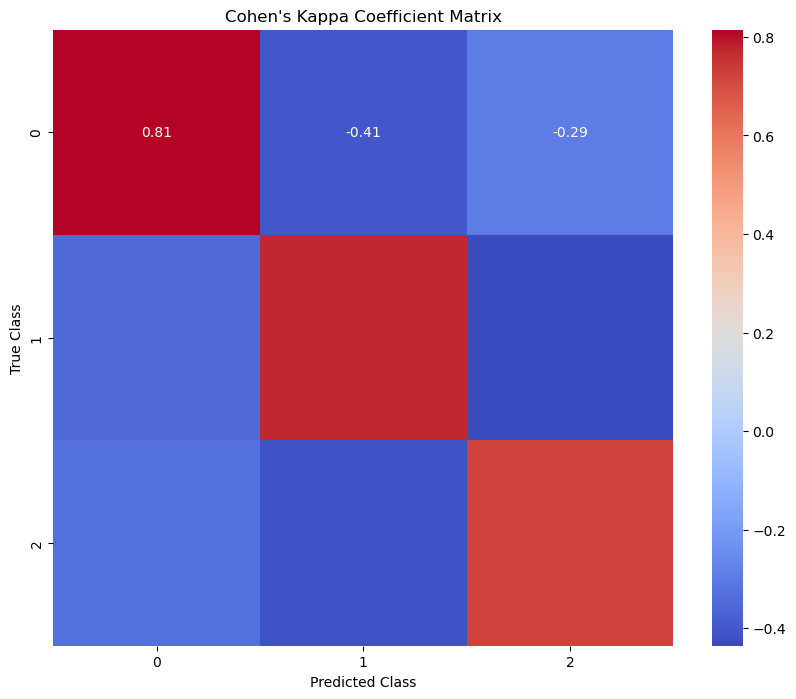

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, cohen_kappa_score

# Make predictions on the test set
y_pred_gb = gradient_boosting.predict(X_test)

# Get unique class labels from y_test
classes = np.unique(y_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_gb)

# Initialize the Cohen's Kappa coefficient matrix
kappa_matrix = np.zeros((len(classes), len(classes)))

# Calculate Cohen's Kappa coefficient for each class combination
for i in range(len(classes)):
    for j in range(len(classes)):
        kappa_matrix[i, j] = cohen_kappa_score(y_test == classes[i], y_pred_gb == classes[j])

# Create a heatmap for the Cohen's Kappa coefficient matrix
plt.figure(figsize=(10, 8))
sns.heatmap(kappa_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title("Cohen's Kappa Coefficient Matrix")
plt.show()


### 4.3.7 Gradient Boosting (MSE)

In [100]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred_gb = gradient_boosting.predict(X_test)

# Calculate Mean Squared Error
gb_mse = mean_squared_error(y_test, y_pred_gb)

print("Mean Squared Error:", gb_mse)


Mean Squared Error: 0.2857142857142857


## 4.4 Neural Network 

### 4.4.1 Neutral Network accuracy test and training test

In [101]:
import numpy as np
np.random.seed(42)
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to categorical (one-hot encoded)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)

# Multiply accuracy by 100 to get percentage
n_acc_test = accuracy * 100

print("Test Accuracy:", n_acc_test)




Epoch 1/50
23/23 [==============================] - 1s 14ms/step - loss: 1.0403 - accuracy: 0.4574 - val_loss: 1.0074 - val_accuracy: 0.4815
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.8945 - accuracy: 0.6360 - val_loss: 0.9452 - val_accuracy: 0.5802
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.8058 - accuracy: 0.6635 - val_loss: 0.8967 - val_accuracy: 0.5556
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.7503 - accuracy: 0.6786 - val_loss: 0.8667 - val_accuracy: 0.5556
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.6827 - val_loss: 0.8496 - val_accuracy: 0.5432
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.6964 - val_loss: 0.8248 - val_accuracy: 0.5679
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.7033 - val_loss: 0.8142 - val_accuracy: 0.5556
Epoch 8/50
23/23 [=

In [102]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print("Test Accuracy:", test_accuracy)

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_categorical)
print("Training Accuracy:", train_accuracy)

7/7 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.6995
Test Accuracy: 0.6995074152946472
26/26 [==============================] - 0s 1ms/step - loss: 0.5283 - accuracy: 0.7466
Training Accuracy: 0.7466007471084595


### 4.4.2 Regularization for Neural Network 

In [103]:
import numpy as np
np.random.seed(42)
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.utils import to_categorical


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variable to categorical (one-hot encoded)
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the neural network architecture with L2 regularization
model = Sequential()
model.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu', kernel_regularizer=l2(0.03)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical)

# Multiply accuracy by 100 to get percentage
n_acc_test = accuracy * 100

print("Test Accuracy:", n_acc_test)



Epoch 1/50
23/23 [==============================] - 1s 13ms/step - loss: 1.7758 - accuracy: 0.4464 - val_loss: 1.7007 - val_accuracy: 0.4568
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 1.5511 - accuracy: 0.6003 - val_loss: 1.5502 - val_accuracy: 0.5062
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 1.4036 - accuracy: 0.6648 - val_loss: 1.4338 - val_accuracy: 0.6049
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 1.2927 - accuracy: 0.6827 - val_loss: 1.3509 - val_accuracy: 0.5802
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 1.2094 - accuracy: 0.6772 - val_loss: 1.2850 - val_accuracy: 0.6049
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 1.1414 - accuracy: 0.6772 - val_loss: 1.2222 - val_accuracy: 0.5926
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 1.0885 - accuracy: 0.6813 - val_loss: 1.1804 - val_accuracy: 0.5926
Epoch 8/50
23/23 [=

In [104]:
# Evaluate the model on test data
test_loss, nn_acc_test = model.evaluate(X_test_scaled, y_test_categorical)
print("Test Accuracy: {:.2f}%".format(nn_acc_test * 100))

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_categorical)
print("Training Accuracy:", train_accuracy)


7/7 [==============================] - 0s 1ms/step - loss: 0.8086 - accuracy: 0.6453
Test Accuracy: 64.53%
26/26 [==============================] - 0s 1ms/step - loss: 0.7389 - accuracy: 0.6860
Training Accuracy: 0.6860321164131165


### 4.4.3 Confusion Matrix 

7/7 [==============================] - 0s 3ms/step
Confusion Matrix:
[[45  1  2]
 [ 6 63 14]
 [16 33 23]]


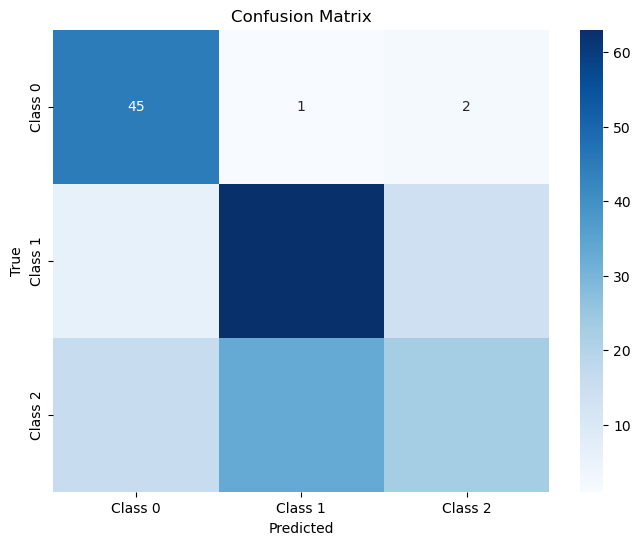

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels back to single labels
y_test_single = np.argmax(y_test_categorical, axis=1)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test_single, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### 4.4.4 Neutral Network Precision, Recall, F1-score

In [106]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test_single, y_pred_classes, target_names=["Class 0", "Class 1", "Class 2"])

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.67      0.94      0.78        48
     Class 1       0.65      0.76      0.70        83
     Class 2       0.59      0.32      0.41        72

    accuracy                           0.65       203
   macro avg       0.64      0.67      0.63       203
weighted avg       0.63      0.65      0.62       203



In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for the overall average
nn_precision = precision_score(y_test_single, y_pred_classes, average='weighted')
nn_recall = recall_score(y_test_single, y_pred_classes, average='weighted')
nn_f1 = f1_score(y_test_single, y_pred_classes, average='weighted')

# Print out overall average precision, recall, and F1-score
print(f"Overall Average Precision: {nn_precision:.2f}")
print(f"Overall Average Recall: {nn_recall:.2f}")
print(f"Overall Average F1-score: {nn_f1:.2f}")


Overall Average Precision: 0.63
Overall Average Recall: 0.65
Overall Average F1-score: 0.62


### 4.4.5 Neural Network AUC

In [108]:
from sklearn.metrics import roc_auc_score

# Predict probabilities for each class
y_pred_prob = model.predict(X_test_scaled)

# Calculate AUC
nn_auc = roc_auc_score(y_test_categorical, y_pred_prob, average='weighted', multi_class='ovr')

# Print out the AUC
print(f"Area Under the ROC Curve (AUC): {nn_auc:.2f}")


7/7 [==============================] - 0s 2ms/step
Area Under the ROC Curve (AUC): 0.80


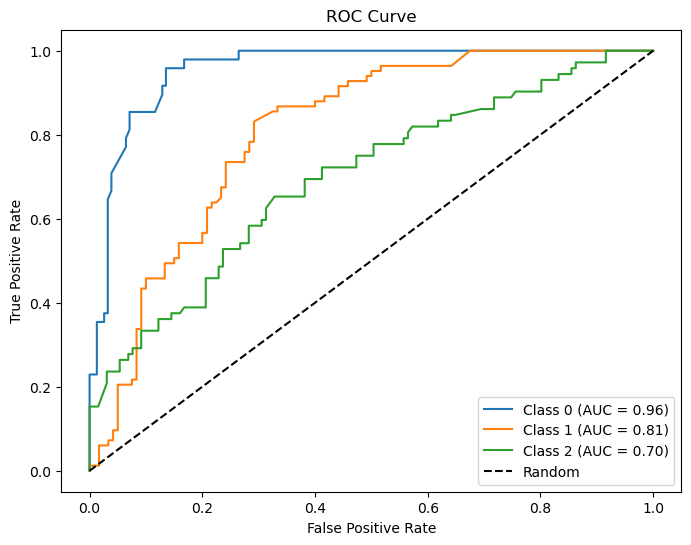

In [109]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):  # Assuming you have 3 classes
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_categorical[:, i], y_pred_prob[:, i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(3):  # Assuming you have 3 classes
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()





### 4.4.6 Neural Network Cohen's Kappa Coefficient

In [110]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score

# Get the predicted probabilities for each class
y_pred_proba = model.predict(X_test_scaled)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert one-hot encoded y_test_categorical back to numerical labels
y_true = np.argmax(y_test_categorical, axis=1)

# Create an empty matrix to store Cohen's Kappa coefficients
kappa_matrix = np.zeros((3, 3))

# Iterate over each class pair
for i in range(3):
    for j in range(3):
        # Extract the subset of true and predicted labels for the current class pair
        y_true_sub = (y_true == i)
        y_pred_sub = (y_pred == j)
        
        # Compute the confusion matrix for the current class pair
        conf_matrix_sub = confusion_matrix(y_true_sub, y_pred_sub)
        
        # Compute Cohen's Kappa coefficient using the confusion matrix
        kappa = cohen_kappa_score(y_true_sub, y_pred_sub)
        
        # Store the Cohen's Kappa coefficient in the matrix
        kappa_matrix[i, j] = kappa

# Print Cohen's Kappa coefficient matrix
print("Cohen's Kappa Matrix:")
print(kappa_matrix)

7/7 [==============================] - 0s 3ms/step
Cohen's Kappa Matrix:
[[ 0.69993496 -0.44257814 -0.21067759]
 [-0.44939983  0.46364615 -0.04318828]
 [-0.16974527 -0.02802498  0.22001537]]


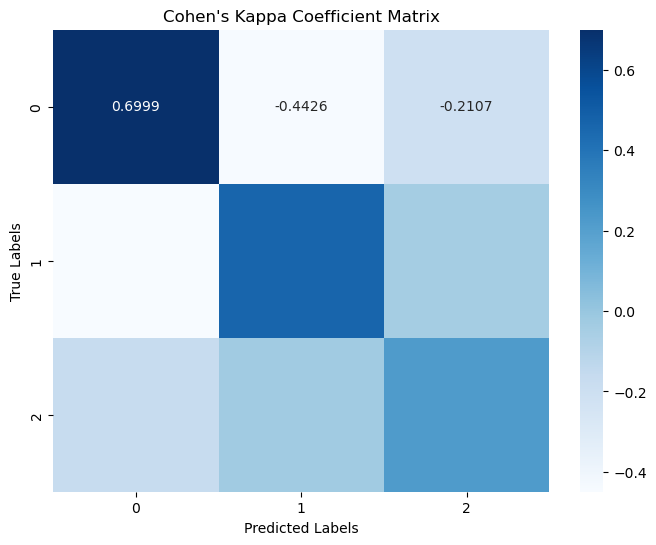

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(kappa_matrix, annot=True, cmap='Blues', fmt='.4f', 
            xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Cohen's Kappa Coefficient Matrix")
plt.show()


In [112]:
from sklearn.metrics import cohen_kappa_score

# Initialize a list to store Cohen's Kappa agreement for each class
class_kappa = []

# Iterate over each class
for class_label in range(3):
    # Extract the subset of true and predicted labels for the current class
    y_true_sub = (y_true == class_label)
    y_pred_sub = (y_pred == class_label)
    
    # Compute Cohen's Kappa coefficient for the current class
    kappa = cohen_kappa_score(y_true_sub, y_pred_sub)
    
    # Append the Cohen's Kappa coefficient to the list
    class_kappa.append(kappa)
    
    # Print Cohen's Kappa coefficient for the current class
    print(f"Cohen's kappa coefficient for class {class_label}: {kappa:.4f}")

# Compute overall Cohen's Kappa agreement
nn_ka = np.mean(class_kappa)

# Print overall Cohen's Kappa agreement
print(f"\nOverall Agreement: {nn_ka:.2f}")




Cohen's kappa coefficient for class 0: 0.6999
Cohen's kappa coefficient for class 1: 0.4636
Cohen's kappa coefficient for class 2: 0.2200

Overall Agreement: 0.46


### 4.4.7 Neural network (MSE)

In [113]:
from sklearn.metrics import mean_squared_error

# Compute MSE
nn_mse = mean_squared_error(y_test_categorical, y_pred_prob)

# Print MSE
print(f"Mean Squared Error (MSE): {nn_mse:.4f}")


Mean Squared Error (MSE): 0.1514


# 5.0 Evaluation

In [114]:
name = ['Decision Tree', 'Random Forest', 'Gradient Boosting','Neural Network']
acc_test = [dt_acc_test, rf_acc_test, gb_acc_test, nn_acc_test*100]
pre_all = [dt_precision, rf_precision, gb_precision, nn_precision*100]
rec_all = [dt_recall, rf_recall, gb_recall, nn_recall*100]
f1_all = [dt_f1, rf_f1, gb_f1, nn_f1*100]
auc_all = [dt_auc, rf_auc, gb_auc, nn_auc]
Kappa = [dt_ka, rf_ka, gb_ka, nn_ka]
mse_all = [dt_mse, rf_mse, gb_mse, nn_mse]



## 5.1 Accuracy

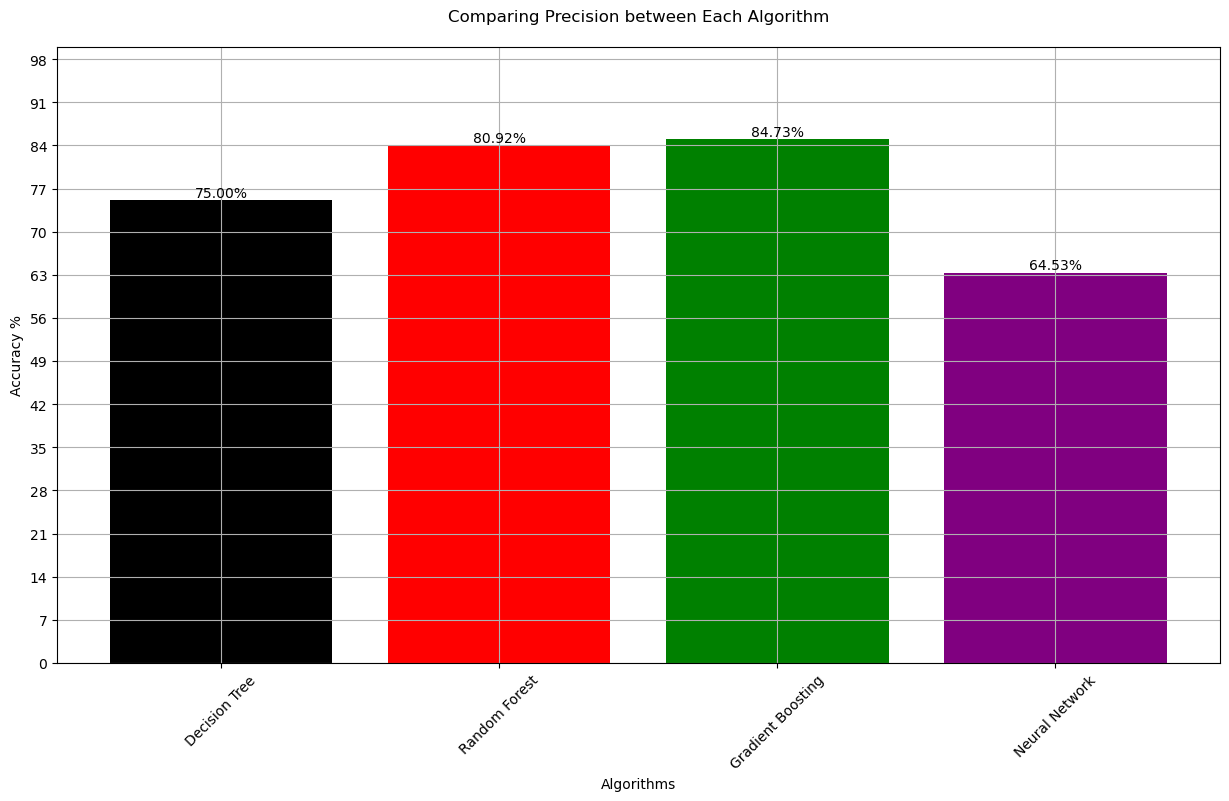

[75.0, 80.92105263157895, 84.72906403940887, 64.5320177078247]


In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Loaded data
name = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network']
acc_test = [dt_acc_test, rf_acc_test, gb_acc_test, nn_acc_test*100]

plt.figure(figsize=(15, 8))
plt.grid(True)
bars = plt.bar(x=name, height=pre_all, color=['black', 'red', 'green', 'purple'])

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim((0, 100))
plt.yticks(np.arange(0, 105, 7))
plt.title("Comparing Precision between Each Algorithm\n")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")

# Print precision scores above each column
for bar, score in zip(bars, acc_test):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{score:.2f}%", 
             ha='center', va='bottom')

plt.show()
print(acc_test)


## 5.2 Precission

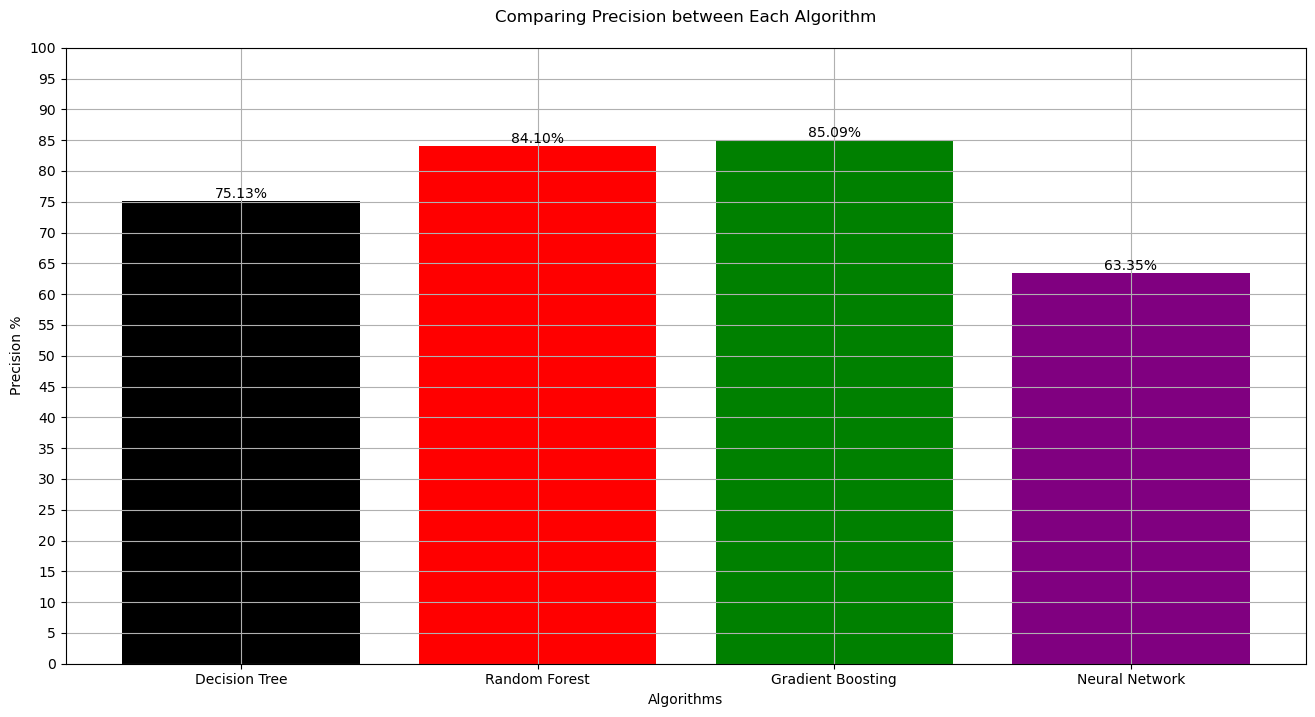

[75.13086328875802, 84.09762999702389, 85.09118951224215, 63.35347828893254]


In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Loaded data
name = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network']
pre_all = [dt_precision, rf_precision, gb_precision, nn_precision*100]

plt.figure(figsize=(16, 8))
plt.grid(True)
bars = plt.bar(x=name, height=pre_all, color=['black', 'red', 'green', 'purple'])

plt.xticks()
plt.ylim((0, 100))
plt.yticks(np.arange(0, 105, 5))
plt.title("Comparing Precision between Each Algorithm\n")
plt.ylabel("Precision %")
plt.xlabel("Algorithms")

# Print precision scores above each column
for bar, score in zip(bars, pre_all):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{score:.2f}%", 
             ha='center', va='bottom')

plt.show()

print(pre_all)


## 5.3 Recall

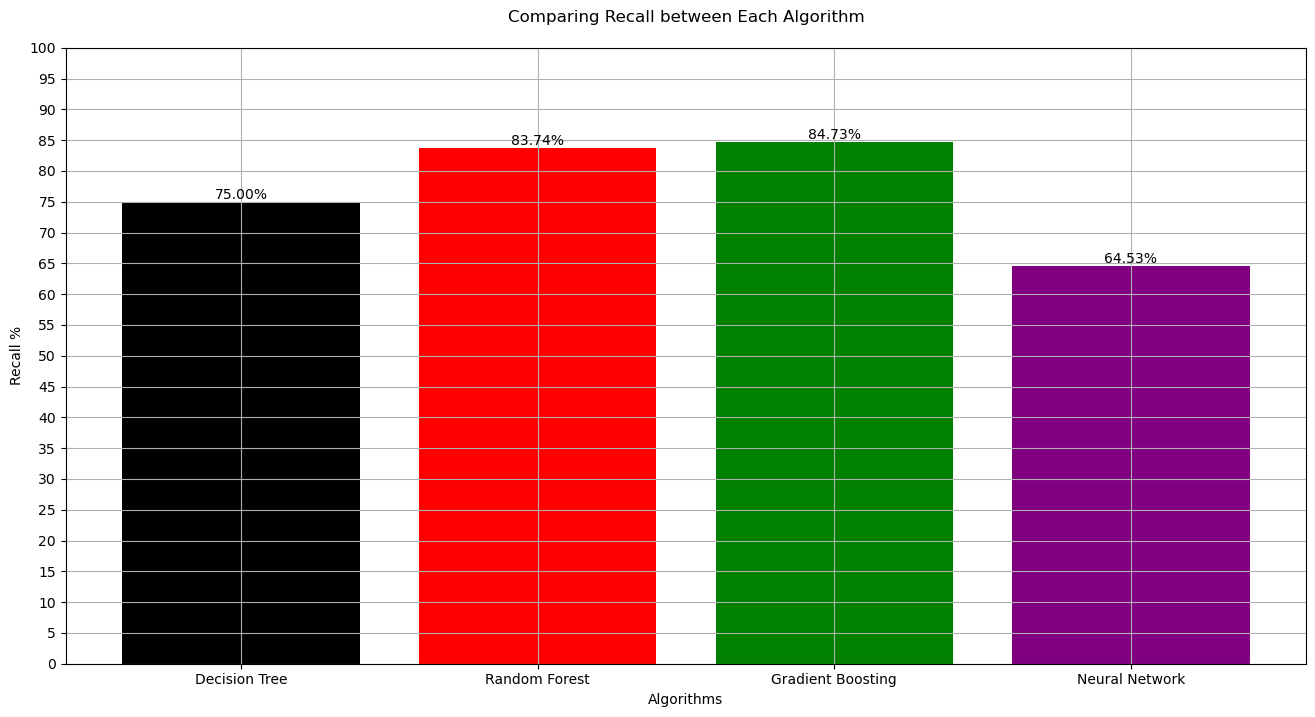

[75.0, 83.74384236453201, 84.72906403940887, 64.5320197044335]


In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Loaded data
name = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network']
rec_all = [dt_recall, rf_recall, gb_recall, nn_recall*100]

plt.figure(figsize=(16, 8))
plt.grid(True)
bars = plt.bar(x=name, height=rec_all, color=['black', 'red', 'green', 'purple'])

plt.xticks()
plt.ylim((0, 100))
plt.yticks(np.arange(0, 105, 5))
plt.title("Comparing Recall between Each Algorithm\n")
plt.ylabel("Recall %")
plt.xlabel("Algorithms")

# Print recall scores above each column
for bar, score in zip(bars, rec_all):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{score:.2f}%", 
             ha='center', va='bottom')

plt.show()

print(rec_all)


## 5.4 F1-score

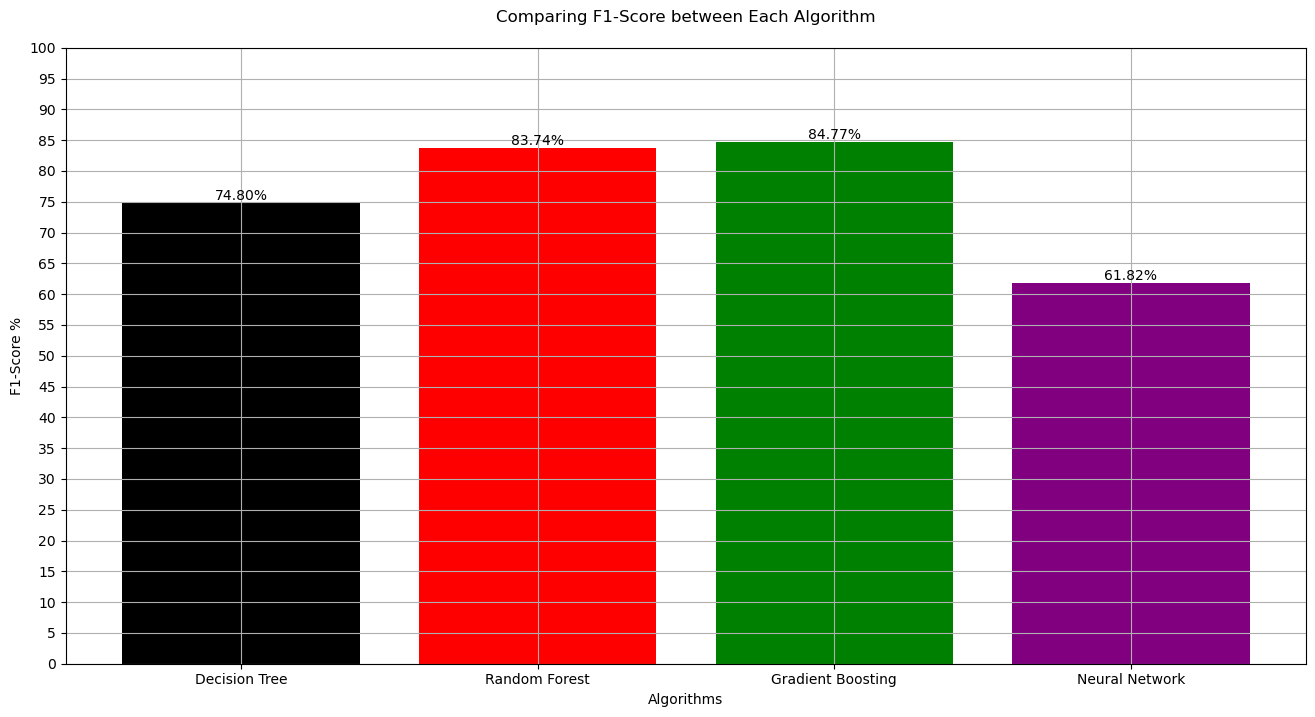

[74.79666802009847, 83.73576356997147, 84.76570902760339, 61.82416513750846]


In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Loaded data
name = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network']
f1_all = [dt_f1, rf_f1, gb_f1, nn_f1*100]

plt.figure(figsize=(16, 8))
plt.grid(True)
bars = plt.bar(x=name, height=f1_all, color=['black', 'red', 'green', 'purple'])

plt.xticks()
plt.ylim((0, 100))
plt.yticks(np.arange(0, 105, 5))
plt.title("Comparing F1-Score between Each Algorithm\n")
plt.ylabel("F1-Score %")
plt.xlabel("Algorithms")

# Print F1-score scores above each column
for bar, score in zip(bars, f1_all):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{score:.2f}%", 
             ha='center', va='bottom')

plt.show()

print(f1_all)


## 5.5 AUC 

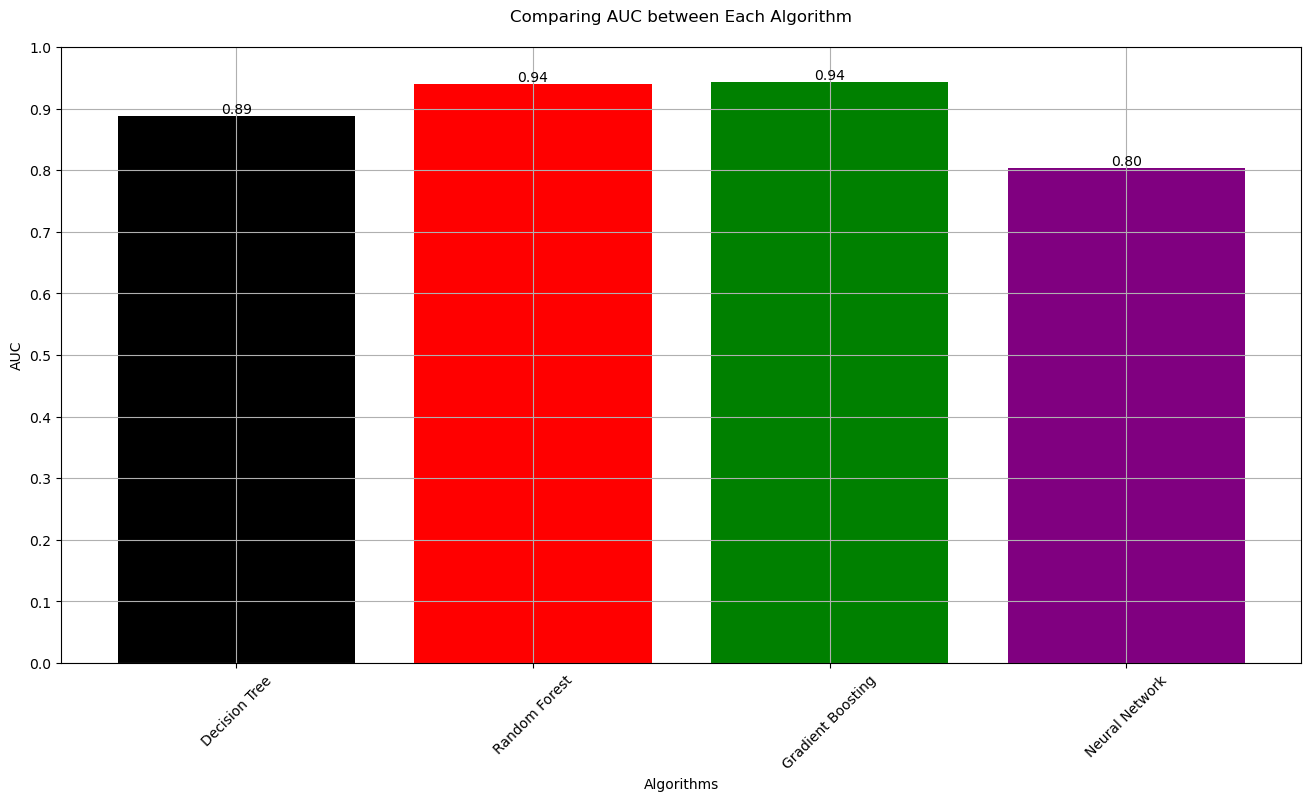

[0.8881057297180973, 0.9399846162949426, 0.942438822844526, 0.8033728406578011]


In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Loaded data
name = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network']
auc_all = [dt_auc, rf_auc, gb_auc, nn_auc]

plt.figure(figsize=(16, 8))
plt.grid(True)
bars = plt.bar(x=name, height=auc_all, color=['black', 'red', 'green', 'purple'])

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.ylim((0, 1))  # AUC values range from 0 to 1
plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks from 0 to 1 with a step of 0.1
plt.title("Comparing AUC between Each Algorithm\n") 
plt.ylabel("AUC")
plt.xlabel("Algorithms")

# Print AUC values above each column
for bar, score in zip(bars, auc_all):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{score:.2f}", 
             ha='center', va='bottom')

plt.show()

print(auc_all)



## 5.6 Kappa Agreement

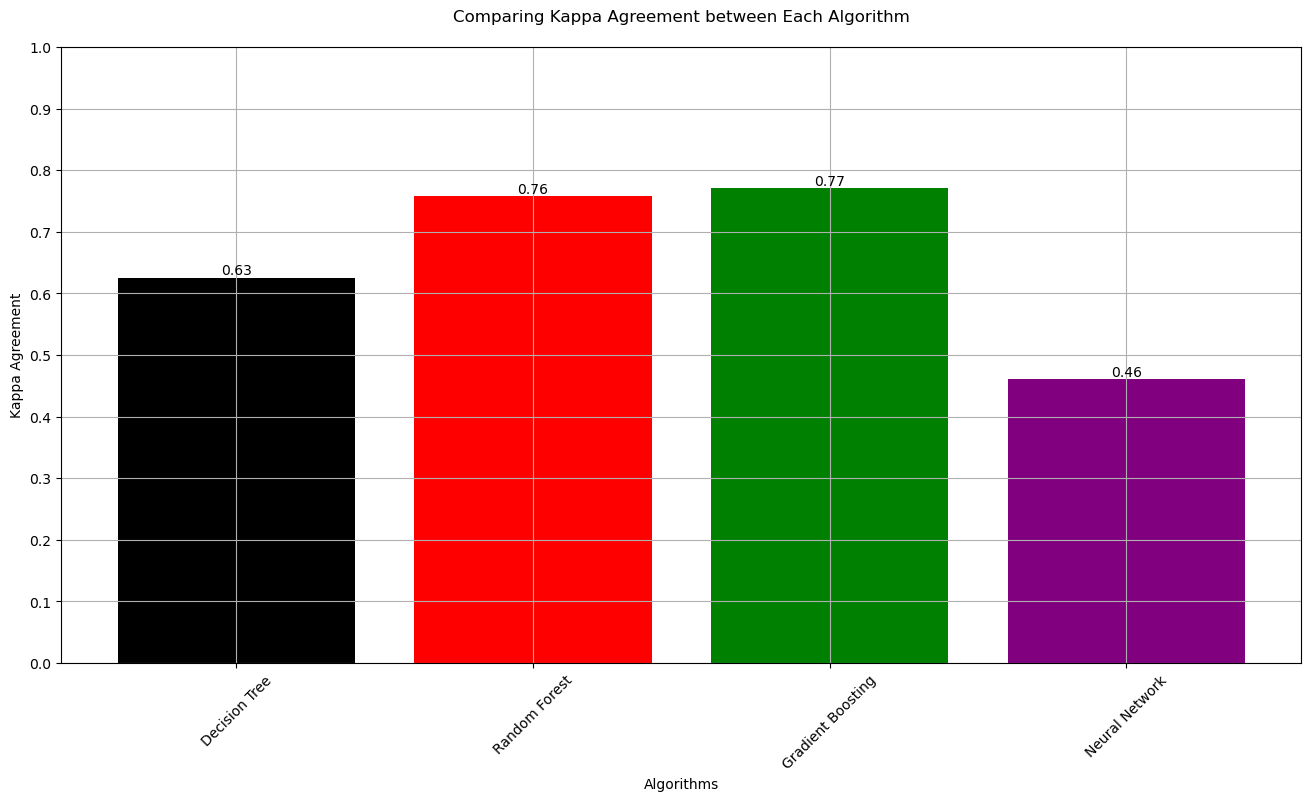

[0.6256116372018129, 0.7573703556876833, 0.7701439621407679, 0.46119882658578715]


In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Loaded data
name = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network']
kappa = [dt_ka, rf_ka, gb_ka, nn_ka]

plt.figure(figsize=(16, 8))
plt.grid(True)
bars = plt.bar(x=name, height=kappa, color=['black', 'red', 'green', 'purple'])

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.ylim((0, 1))  # Kappa values range from 0 to 1
plt.yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks from 0 to 1 with a step of 0.1
plt.title("Comparing Kappa Agreement between Each Algorithm\n") 
plt.ylabel("Kappa Agreement")
plt.xlabel("Algorithms")

# Print Kappa agreement values above each column
for bar, score in zip(bars, kappa):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{score:.2f}", 
             ha='center', va='bottom')

plt.show()

print(kappa)



## 5.7 MSE

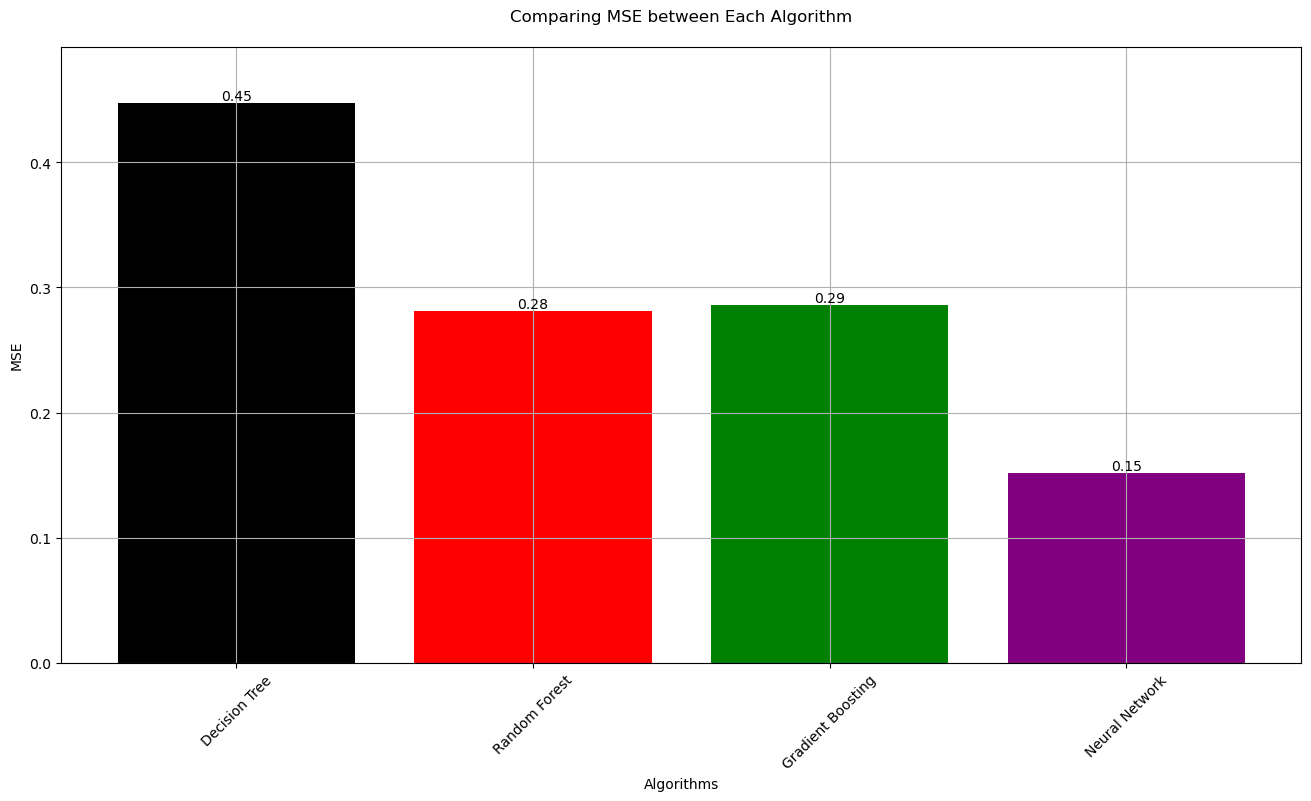

[0.4473684210526316, 0.28078817733990147, 0.2857142857142857, 0.151374]


In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Loaded data
name = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network']
mse_all = [dt_mse, rf_mse, gb_mse, nn_mse]

plt.figure(figsize=(16, 8))
plt.grid(True)
bars = plt.bar(x=name, height=mse_all, color=['black', 'red', 'green', 'purple'])

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.ylim((0, max(mse_all) * 1.1))  # Set y-axis limits slightly higher than maximum MSE value
plt.title("Comparing MSE between Each Algorithm\n") 
plt.ylabel("MSE")
plt.xlabel("Algorithms")

# Print MSE values above each column
for bar, score in zip(bars, mse_all):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{score:.2f}", 
             ha='center', va='bottom')

plt.show()

print(mse_all)



# 6.0 Deployment

In [131]:
##### import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import pickle


risk_level_mapping = {
    0: 'High Risk',
    1: 'Low Risk',
    2: 'Mid Risk',
}

# Function to load the saved model and predict risk level
def predict_risk_level(input_data):
    # Load the saved model
    with open("gradient_boosting_model.pkl", "rb") as file:
        model = pickle.load(file)
    
    # Ensure consistent feature order with those used during training
    input_data_renamed = {
        'Age': input_data['Age'],
        'SystolicBP': input_data['Systolic Blood Pressure'],
        'DiastolicBP': input_data['Diastolic Blood Pressure'],
        'BS': input_data['Blood Sugar'],
        'BodyTemp': input_data['Body Temperature'],
        'HeartRate': input_data['Heart Rate'],

    }
    
    # Convert input to DataFrame with consistent column order
    input_df = pd.DataFrame([input_data_renamed])
    
    # Predict risk level
    prediction = model.predict(input_df)
    
    # Get the encoded label
    encoded_label = prediction[0]
    
    # Map the encoded label to risk level
    risk_level = risk_level_mapping[encoded_label]
    
    return encoded_label, risk_level

# Function to prompt user for input and validate against negative values
def prompt_and_validate_input(prompt_message, error_message):
    while True:
        try:
            user_input = float(input(prompt_message))
            if user_input < 0:
                print(error_message)
                continue
            return user_input
        except ValueError:
            print("Invalid input. Please enter a valid number.")

# Prompt user for input and validate against negative values and non-numeric characters
user_input = {}
user_input['Age'] = prompt_and_validate_input("Enter Age: ", "Age cannot be negative. Please enter a valid value.")
user_input['Systolic Blood Pressure'] = prompt_and_validate_input("Enter Systolic Blood Pressure: ", "Systolic Blood Pressure cannot be negative. Please enter a valid value.")
user_input['Diastolic Blood Pressure'] = prompt_and_validate_input("Enter Diastolic Blood Pressure: ", "Diastolic Blood Pressure cannot be negative. Please enter a valid value.")
user_input['Blood Sugar'] = prompt_and_validate_input("Enter Blood Sugar: ", "Blood Sugar cannot be negative. Please enter a valid value.")
user_input['Body Temperature'] = prompt_and_validate_input("Enter Body Temperature: ", "Body Temperature cannot be negative. Please enter a valid value.")
user_input['Heart Rate'] = prompt_and_validate_input("Enter Heart Rate: ", "Heart Rate cannot be negative. Please enter a valid value.")

predicted_risk_encoded, predicted_risk_label = predict_risk_level(user_input)
print("Predicted Risk Level (Number):", predicted_risk_encoded)
print("Predicted Risk Level (Description):", predicted_risk_label)

Enter Age:  60
Enter Systolic Blood Pressure:  2000
Enter Diastolic Blood Pressure:  -90


Diastolic Blood Pressure cannot be negative. Please enter a valid value.


Enter Diastolic Blood Pressure:  q


Invalid input. Please enter a valid number.


Enter Diastolic Blood Pressure:  1.333
Enter Blood Sugar:  2000
Enter Body Temperature:  2000
Enter Heart Rate:  2000


Predicted Risk Level (Number): 0
Predicted Risk Level (Description): High Risk
